In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
import numpy as np

plt.style.use('ggplot')

## Test accuracy

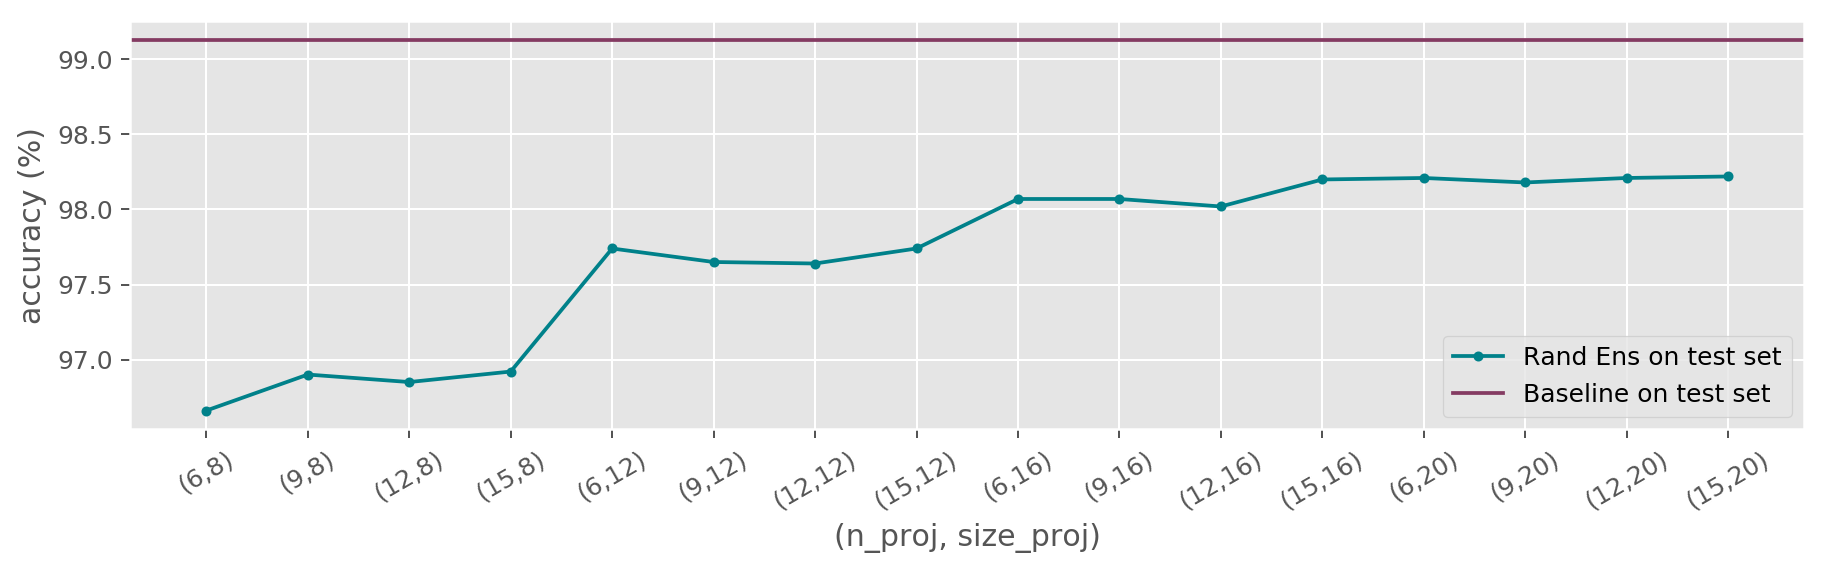

In [2]:
# random ensemble accuracy vs evaluation set
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)
baseline_test = 99.13
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
figure(figsize=(12, 3), dpi=180, facecolor='w', edgecolor='k')

plt.plot(x,random_test,color='#00818a',label='Rand Ens on test set', marker=".")
plt.axhline(y=baseline_test,color='#843b62',label='Baseline on test set')
plt.xlabel('(n_proj, size_proj)')
plt.ylabel('accuracy (%)')
plt.xticks(x, xlab, rotation=30) 
plt.legend()

#plt.title("Random Ensemble vs Baseline model accuracy on test set")
plt.show()

## Adversarial accuracy

In [8]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [       
96.60, 
96.90, 
97.03, 
97.05, 
97.73, 
97.72, 
97.74, 
97.74, 
97.92, 
98.04, 
98.08, 
98.13, 
98.30, 
98.30, 
98.31, 
98.33]
random_fgsm = [
    28.74, 
30.41, 
30.93, 
32.30, 
30.07, 
30.40, 
30.38, 
31.04, 
28.14, 
28.20, 
27.90, 
27.97, 
24.75, 
24.58, 
24.75, 
25.03
    ]
random_deepf = [93.65, 
94.11, 
94.39, 
94.52, 
95.59, 
95.68, 
95.92, 
95.80, 
96.15, 
96.37, 
96.52, 
96.53, 
96.44, 
96.59, 
96.65, 
96.77  ]
random_pgd = [
    63.38,
62.58,
63.56,
64.75,
61.37,
62.05,
62.85,
63.84,
58.40,
58.65,
59.79,
60.94,
55.75,
56.88,
57.58,
57.56 
]
random_carlini_linf = [         
 92.20,  
 93.17,  
 93.45,  
 93.53,  
 94.19,  
 94.34,  
 94.47,  
 94.56,  
 94.60,  
 95.09,  
 95.17,  
 95.23,  
 95.36,  
 95.56,  
 95.53,  
 95.62]

random_fgsm_sum = [23.27,  26.51,  27.82,  29.68,  25.64,  27.28,  27.94,  28.88,  24.14, 25.36,  25.78,  26.50,  21.73, 
 22.60,  23.52,  23.92]
random_pgd_sum = [52.09,55.60,57.86,60.64,53.14,56.53,58.63,60.54,51.22,54.12,56.33,58.15,49.39,53.01,54.65,55.18]
random_deepf_sum = [ 93.94,  94.37,  94.61, 94.62, 95.72, 95.82, 95.96, 95.84, 96.26, 96.43, 96.54, 96.62, 96.51, 96.63, 
 96.67, 96.80] 
random_carlini_linf_sum = [ 91.63,  92.58, 93.17, 93.23, 93.60, 94.01, 94.22, 94.33, 94.35, 94.73, 94.97, 94.98, 94.92, 95.33,
 95.34,  95.45 ]

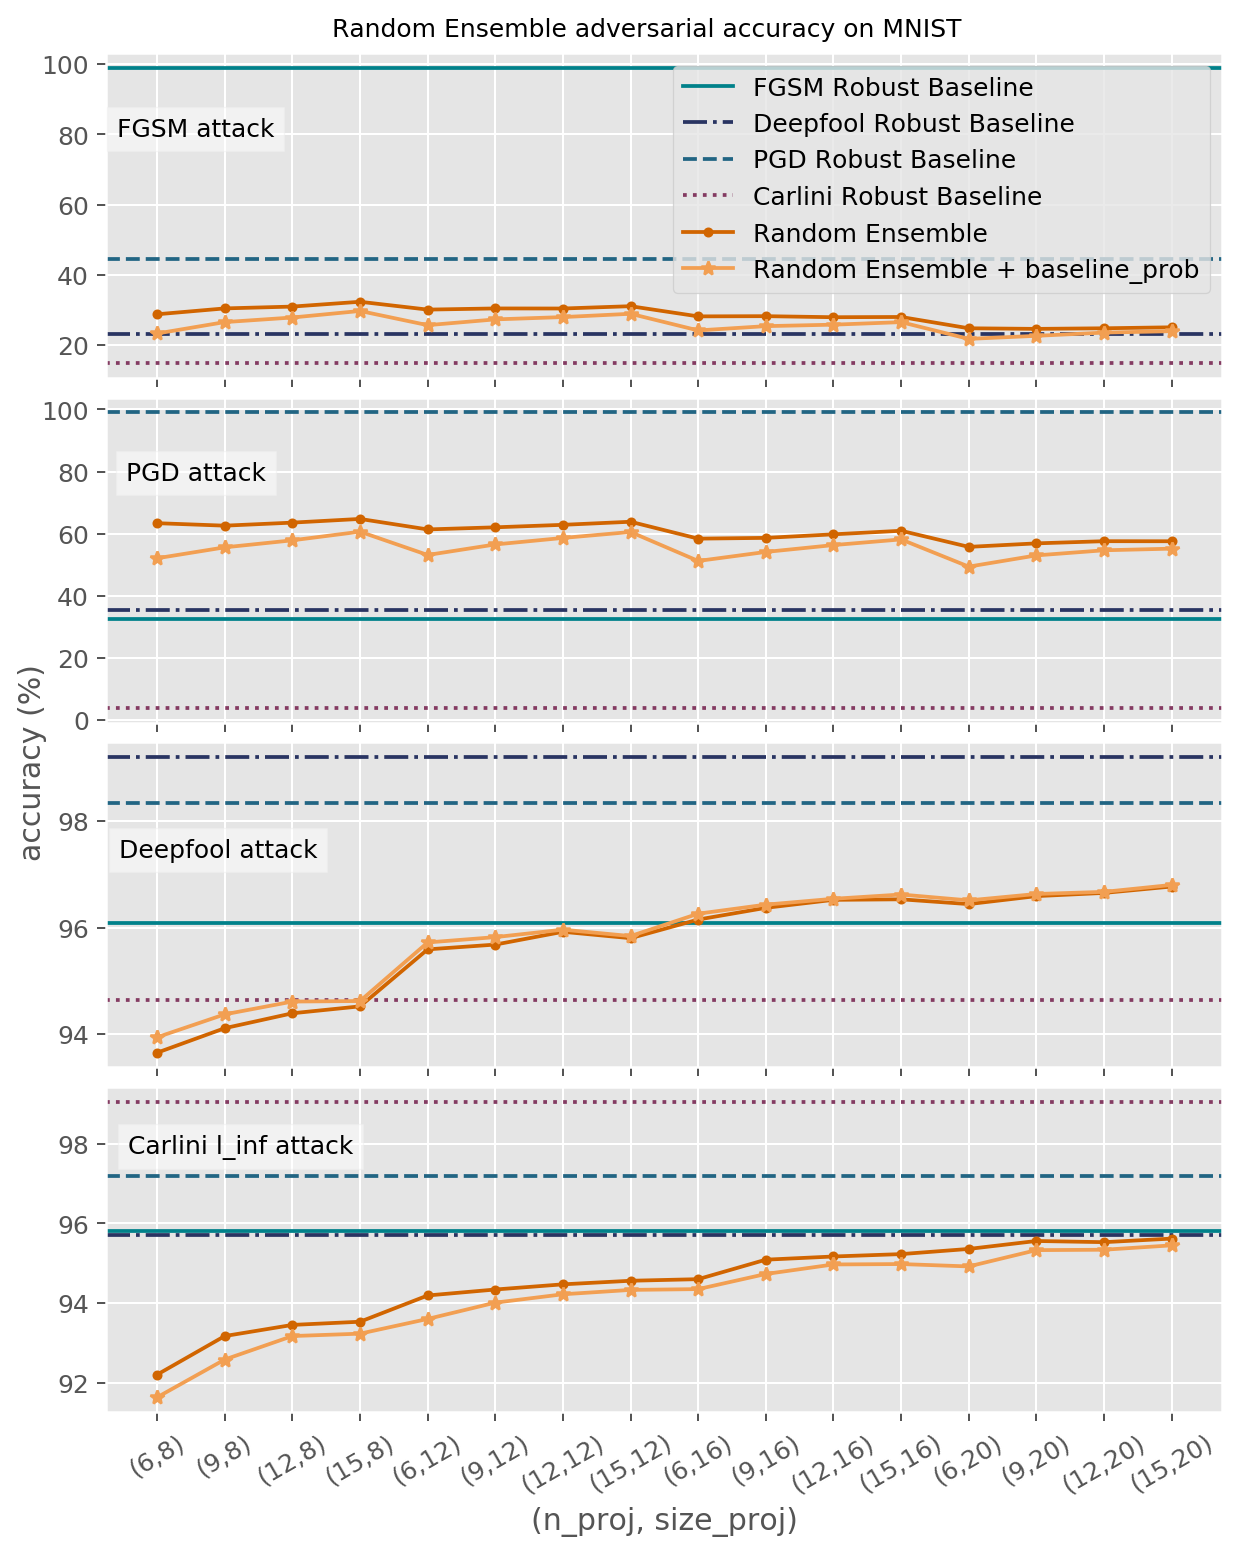

In [12]:
# random ensemble accuracy vs evaluation set


xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 10), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,2))
plt.xlabel('(n_proj, size_proj)')
plt.xticks(x, xlab, rotation=30) 
fig.subplots_adjust(hspace=0.06)

#ax1.axhline(y=baseline_fgsm, color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax1.axhline(y=fgsm_robust_baseline[1], color="#00818a", label='FGSM Robust Baseline')
ax1.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,random_fgsm,color="#d16500",label='Random Ensemble', marker=".")
ax1.plot(x,random_fgsm_sum,color="#f29f52",label='Random Ensemble + baseline_prob', marker="*")
ax1.legend(loc='best')
ax1.set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))


#ax2.axhline(y=baseline_pgd, color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax2.axhline(y=fgsm_robust_baseline[2], color="#00818a",label='FGSM Robust Baseline')
ax2.axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax2.axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
#ax2.plot(x,random_pgd,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
ax2.plot(x,random_pgd,color="#d16500",label='Random Ensemble', marker=".")
ax2.plot(x,random_pgd_sum,color="#f29f52",label='Random Ensemble + baseline_prob', marker="*")
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax2.set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))

#ax3.axhline(y=baseline_deepf, color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax3.axhline(y=fgsm_robust_baseline[3], color="#00818a",label='FGSM Robust Baseline')
ax3.axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax3.axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
#ax3.plot(x,random_deepf,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
ax3.plot(x,random_deepf,color="#d16500",label='Random Ensemble', marker=".")
ax3.plot(x,random_deepf_sum,color="#f29f52",label='Random Ensemble + baseline_prob', marker="*")
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.6,
             bbox=dict(facecolor='white', alpha=0.5))

#ax4.axhline(y=baseline_carlini_linf, color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax4.axhline(y=fgsm_robust_baseline[4], color="#00818a",label='FGSM Robust Baseline')
ax4.axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax4.axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
#ax4.plot(x,random_carlini_linf,color="#FB8B00",label='Random Ensemble', marker=".")
ax4.plot(x,random_carlini_linf,color="#d16500",label='Random Ensemble', marker=".")
ax4.plot(x,random_carlini_linf_sum,color="#f29f52",label='Random Ensemble + baseline_prob', marker="*")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble adversarial accuracy on MNIST", fontsize=10, y=0.9)
fig.show()

## randens + baseline accuracy MNIST

/home/ginevracoal/virtualenvs/venv/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


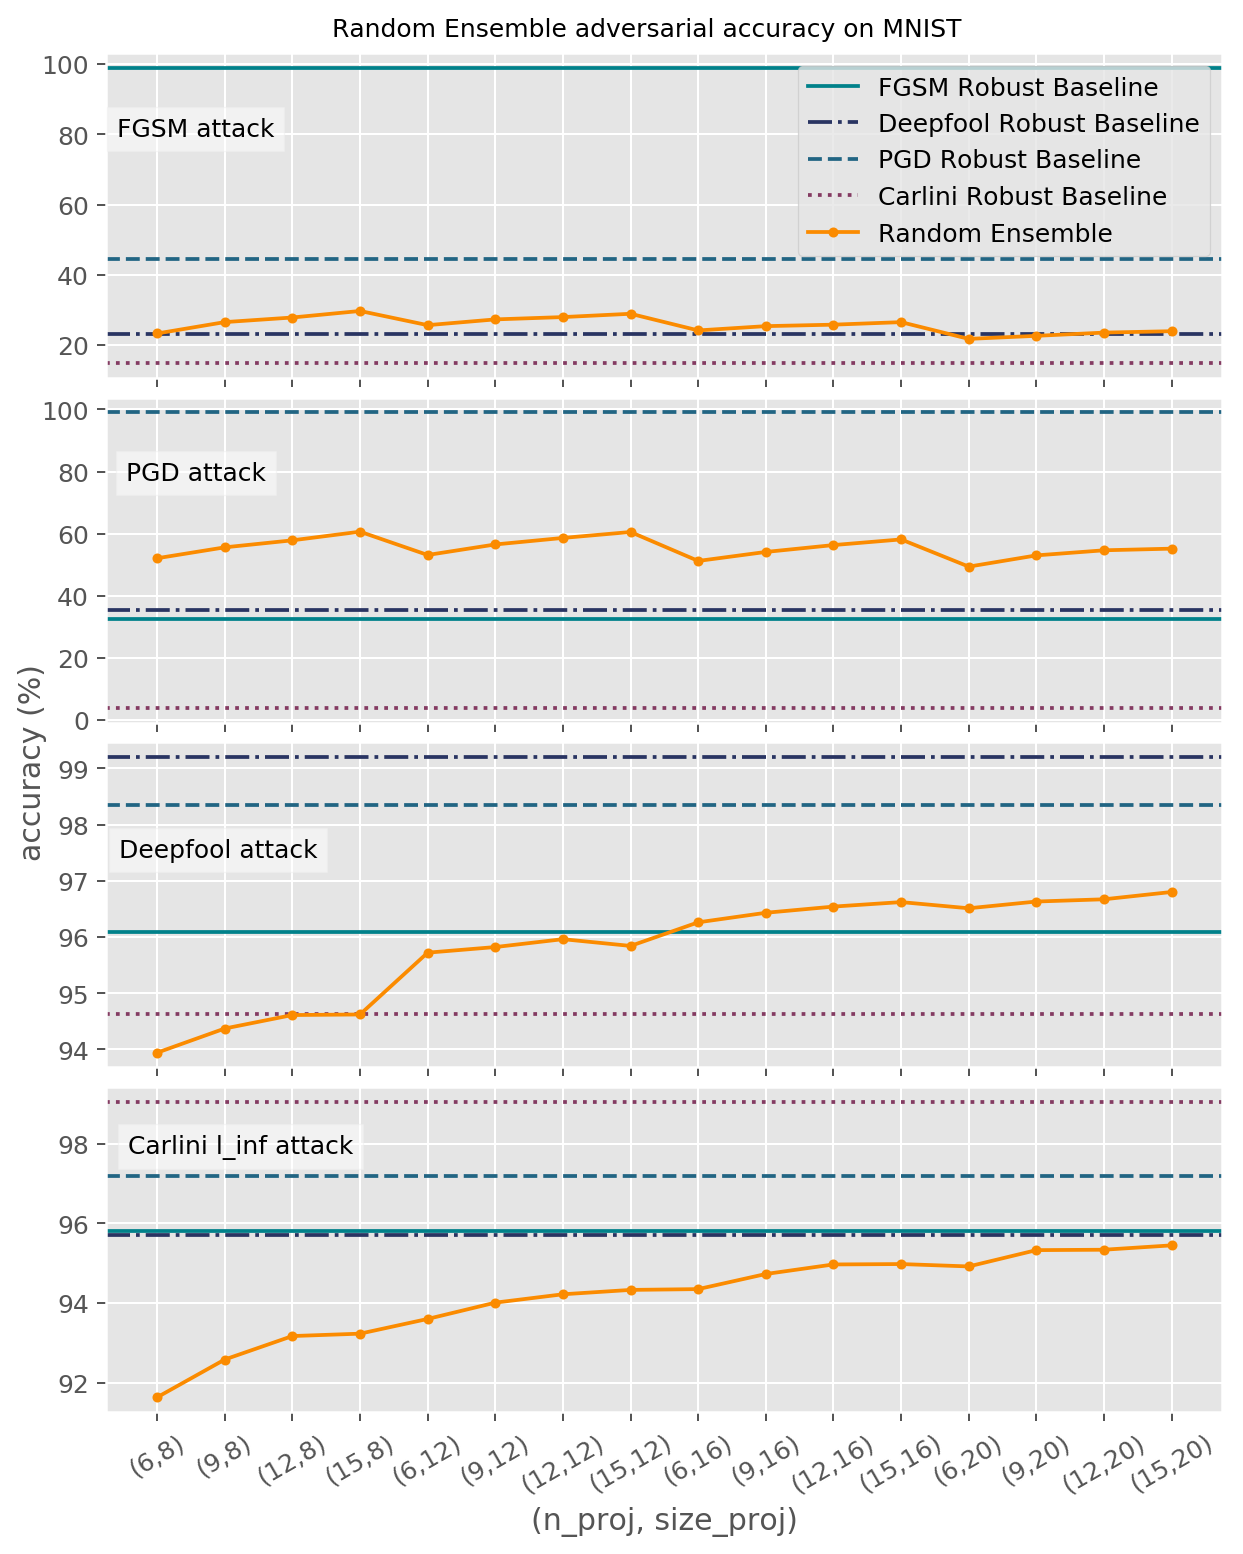

In [4]:
# random ensemble accuracy vs evaluation set

baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]




xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 10), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,2))
plt.xlabel('(n_proj, size_proj)')
plt.xticks(x, xlab, rotation=30) 
fig.subplots_adjust(hspace=0.06)

#ax1.axhline(y=baseline_fgsm, color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax1.axhline(y=fgsm_robust_baseline[1], color="#00818a", label='FGSM Robust Baseline')
ax1.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,random_fgsm,color="#FB8B00",label='Random Ensemble', marker=".")
ax1.legend(loc='best')
ax1.set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))


#ax2.axhline(y=baseline_pgd, color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax2.axhline(y=fgsm_robust_baseline[2], color="#00818a",label='FGSM Robust Baseline')
ax2.axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax2.axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,random_pgd,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax2.set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))

#ax3.axhline(y=baseline_deepf, color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax3.axhline(y=fgsm_robust_baseline[3], color="#00818a",label='FGSM Robust Baseline')
ax3.axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax3.axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.6,
             bbox=dict(facecolor='white', alpha=0.5))

#ax4.axhline(y=baseline_carlini_linf, color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax4.axhline(y=fgsm_robust_baseline[4], color="#00818a",label='FGSM Robust Baseline')
ax4.axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax4.axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini_linf,color="#FB8B00",label='Random Ensemble', marker=".")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble adversarial accuracy on MNIST", fontsize=10, y=0.9)
fig.show()

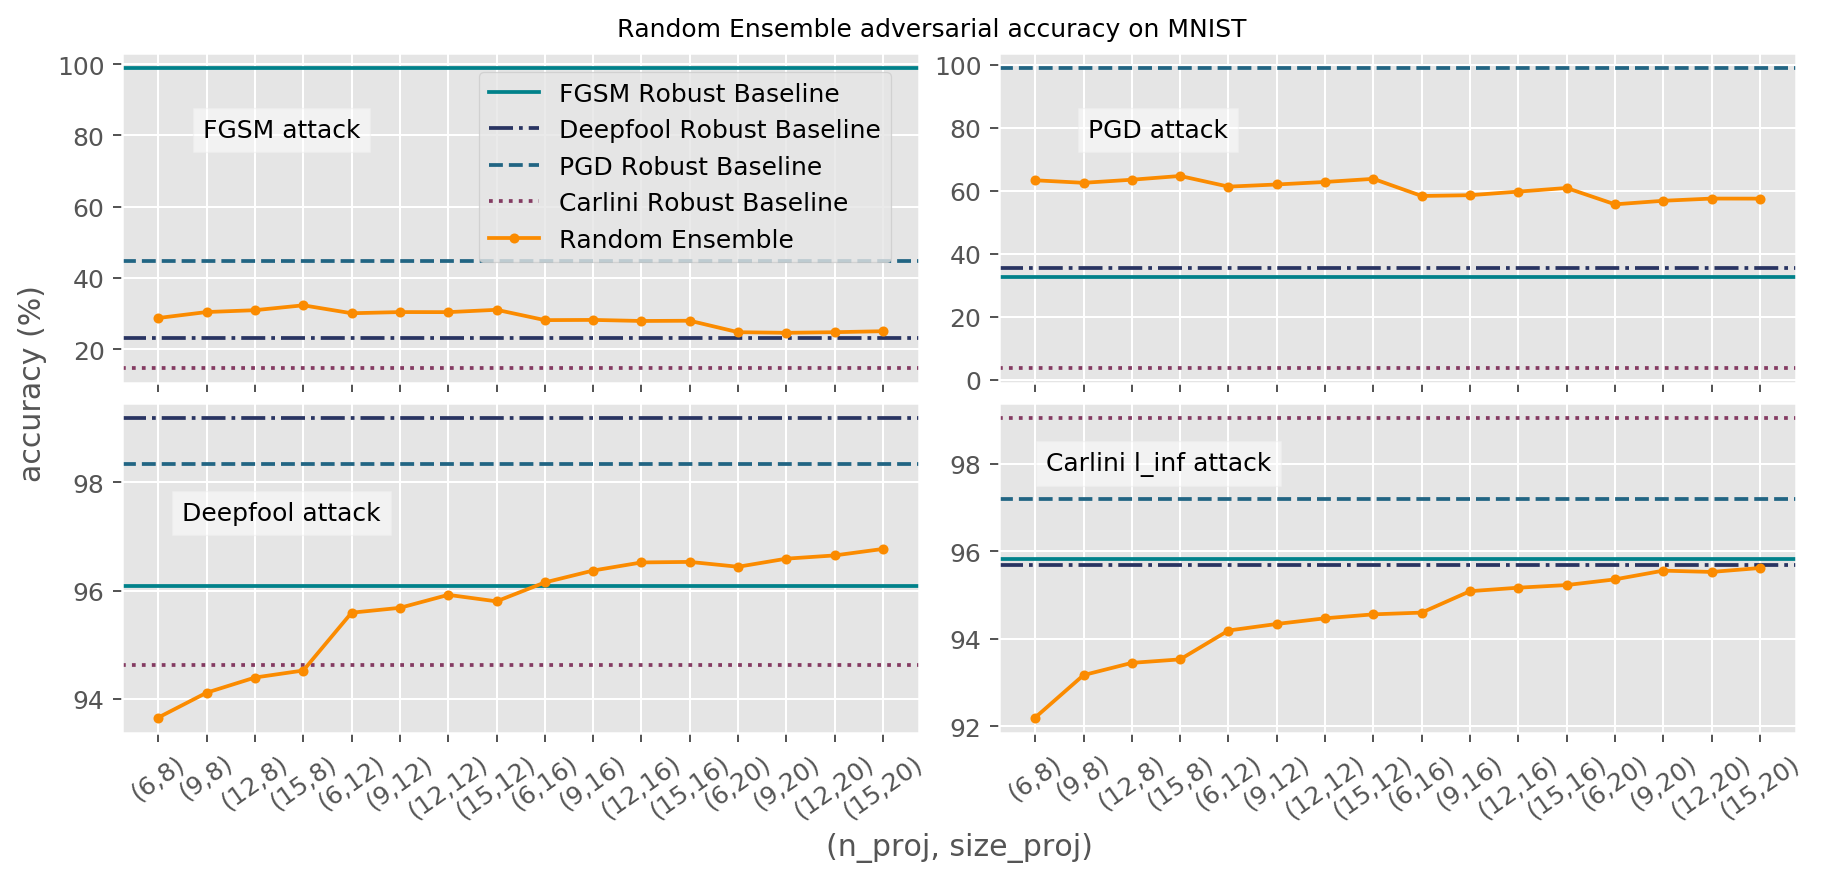

In [81]:
# random ensemble accuracy vs evaluation set


xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12, 5), dpi=180)


#ax1.axhline(y=baseline_fgsm, color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax[0,0].axhline(y=fgsm_robust_baseline[1], color="#00818a", label='FGSM Robust Baseline')
ax[0,0].axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax[0,0].axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax[0,0].axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax[0,0].plot(x,random_fgsm,color="#FB8B00",label='Random Ensemble', marker=".")
ax[0,0].set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.2, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels([])


#ax2.axhline(y=baseline_pgd, color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax[0,1].axhline(y=fgsm_robust_baseline[2], color="#00818a",label='FGSM Robust Baseline')
ax[0,1].axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax[0,1].axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax[0,1].axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax[0,1].plot(x,random_pgd,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax[0,1].set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.2, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels([])

#ax3.axhline(y=baseline_deepf, color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax[1,0].axhline(y=fgsm_robust_baseline[3], color="#00818a",label='FGSM Robust Baseline')
ax[1,0].axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax[1,0].axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax[1,0].axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax[1,0].plot(x,random_deepf,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax[1,0].set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.2, y=0.6,
             bbox=dict(facecolor='white', alpha=0.5))

ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(xlab, rotation=35)

#ax4.axhline(y=baseline_carlini_linf, color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax[1,1].axhline(y=fgsm_robust_baseline[4], color="#00818a",label='FGSM Robust Baseline')
ax[1,1].axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax[1,1].axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax[1,1].axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax[1,1].plot(x,random_carlini_linf,color="#FB8B00",label='Random Ensemble', marker=".")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax[1,1].set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.2, y=0.75,
             bbox=dict(facecolor='white', alpha=0.5))

ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(xlab, rotation=35)

ax[0,0].set_ylabel('accuracy (%)', position=(0,0))
ax[1,1].set_xlabel('(n_proj, size_proj)', position=(-0.05,0))
fig.subplots_adjust(hspace=0.06,wspace=0.1)
ax[0,0].legend(loc='best', bbox_to_anchor=(0.98,0.33))

fig.suptitle("Random Ensemble adversarial accuracy on MNIST", fontsize=10, y=0.92)
fig.show()

In [ ]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [       
96.60, 
96.90, 
97.03, 
97.05, 
97.73, 
97.72, 
97.74, 
97.74, 
97.92, 
98.04, 
98.08, 
98.13, 
98.30, 
98.30, 
98.31, 
98.33]
random_fgsm = [
    28.74, 
30.41, 
30.93, 
32.30, 
30.07, 
30.40, 
30.38, 
31.04, 
28.14, 
28.20, 
27.90, 
27.97, 
24.75, 
24.58, 
24.75, 
25.03
    ]
random_deepf = [93.65, 
94.11, 
94.39, 
94.52, 
95.59, 
95.68, 
95.92, 
95.80, 
96.15, 
96.37, 
96.52, 
96.53, 
96.44, 
96.59, 
96.65, 
96.77  ]
random_pgd = [
    63.38,
62.58,
63.56,
64.75,
61.37,
62.05,
62.85,
63.84,
58.40,
58.65,
59.79,
60.94,
55.75,
56.88,
57.58,
57.56 
]
random_carlini_linf = [         
 92.20,  
 93.17,  
 93.45,  
 93.53,  
 94.19,  
 94.34,  
 94.47,  
 94.56,  
 94.60,  
 95.09,  
 95.17,  
 95.23,  
 95.36,  
 95.56,  
 95.53,  
 95.62]

In [ ]:
# data
baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

# xticks
x = range(16)
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

# plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False,  figsize=(12, 3), dpi=180)
#fig.suptitle("Random Ensemble vs Baseline accuracy on the adversaries", size=14)

ax1.set_title("FGSM attacks", size=12)
ax1.plot(x,random_fgsm,color="r",label='Rand Ens')
ax1.axhline(y=baseline_fgsm, color="darkred", label='Baseline')
ax1.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax1.set_xticks(x, xlab) 
ax1.set_xticklabels(xlab, rotation=45)

ax2.set_title("DeepFool attacks", size=12)
ax2.plot(x,random_deepf,color="dodgerblue",label='Rand Ens')
ax2.axhline(y=baseline_deepf, color="darkblue",label='Baseline')
ax2.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax2.set_xticks(x, xlab) 
ax2.set_xticklabels(xlab, rotation=45)

ax3.set_title("PGD attacks", size=12)
ax3.plot(x,random_pgd,color="limegreen",label='Rand Ens')
ax3.axhline(y=baseline_pgd, color="darkgreen",label='Baseline')
ax3.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax3.set_xticks(x, xlab) 
ax3.set_xticklabels(xlab, rotation=45)

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('(n_proj, size_proj)', position=(0.5,0))
fig.show()

## Complexity mnist

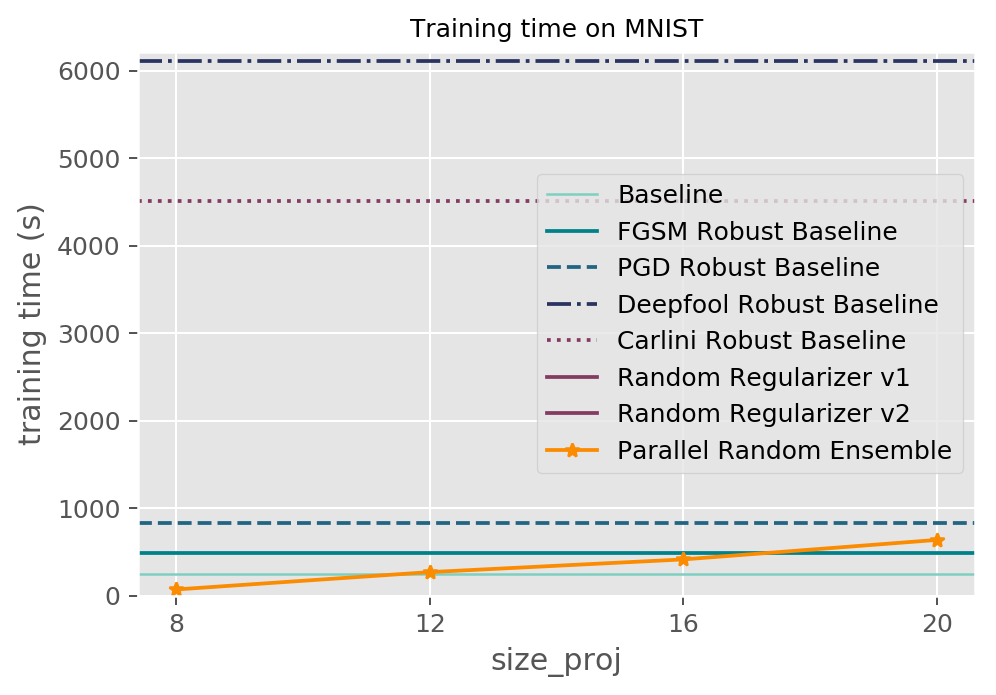

In [78]:
# random ensemble accuracy vs evaluation set

xlab = ["8","12","16","20"]
x = range(4)

# plain, fgsm, pgd, deepfool, carlini_linf
baseline = [244.64,486.45,833.16,6116.33,4507.31]

randens_times_old = [161.56358885765076, 244.69218850135803, 330.3099126815796, 449.8663718700409,
                 306.13498520851135, 462.9905071258545, 614.2709856033325, 754.4713060855865,
                 481.06000685691833, 730.0027039051056, 969.5257754325867, 1202.7333579063416,
                 713.6330585479736, 1042.581505537033, 1423.9588317871094, 1784.10049700737]

randens_times = [1045.2583463191986,
2555.6296741962433, 
3144.4848911762238, 
1316.7294340133667, 
2173.0551035404205, 
6833.772572278976,  
8294.763188838959,  
12240.271400928497, 
3718.577780723572,  
14803.005425453186, 
27848.05566883087,  
23362.26087665558,  
5714.933403015137,  
17924.82506251335,  
26164.82797217369,  
26257.255435466766 ]

par_randens_times = [ 69.18349480628967,267.5957431793213,412.77997064590454,635.8284521102905]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
plt.axhline(y=baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
plt.axhline(y=baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")

plt.axhline(y=randreg_times[1], color="#843b62", label='Random Regularizer v1')
plt.axhline(y=randreg_times[2], color="#843b62", label='Random Regularizer v2')
#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.yscale("log")



plt.xlabel('size_proj')
plt.ylabel('training time (s)')
plt.xticks(x, xlab, rotation=0) 
plt.ylim([0, baseline[3]+100])
plt.legend(loc='center right')
plt.title("Training time on MNIST",fontsize=10)
plt.show()

## Cifar complexity 80 epochs

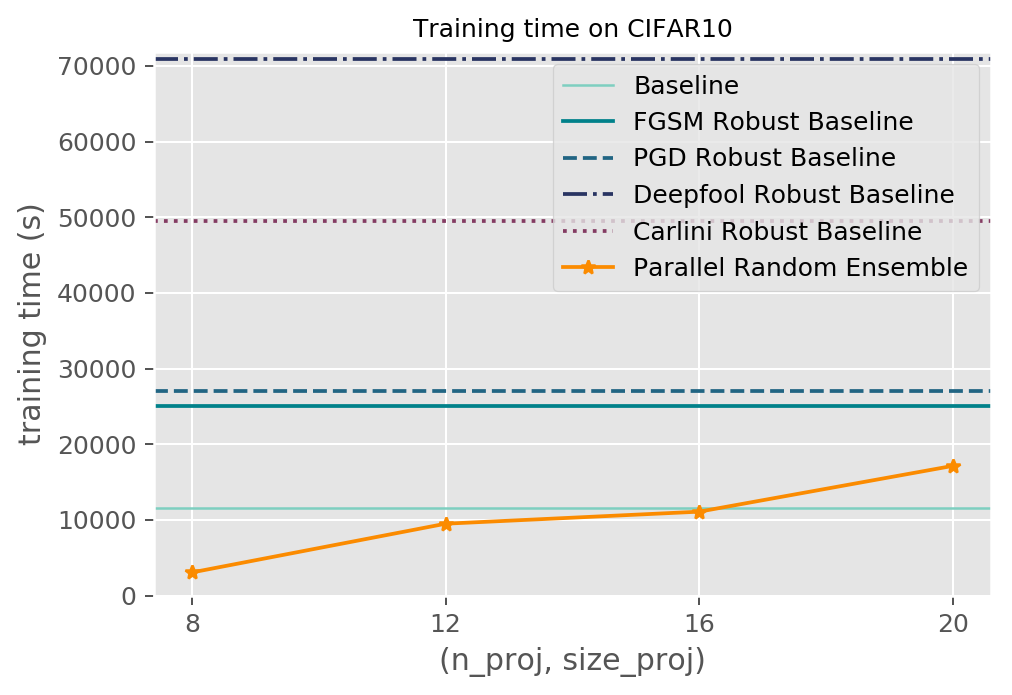

In [39]:
# random ensemble accuracy vs evaluation set


xlab = ["8","12","16","20"]
x = range(4)

# plain, fgsm, pgd, deepfool, carlini_linf
baseline = [11555.19160747528,25108.290491104126,27043.505586862564,70846.34929156303,49535.69976067543]

randens_times = [ ]

par_randens_times = [ 3050.729281425476, 9490.245878458023,  11081.634799718857,17134.651045799255]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
plt.axhline(y=baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
plt.axhline(y=baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")

#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.yscale("log")



plt.xlabel('(n_proj, size_proj)')
plt.ylabel('training time (s)')
plt.xticks(x, xlab, rotation=0) 
plt.ylim([0, baseline[3]+1000])
plt.legend(loc='upper right')
plt.title("Training time on CIFAR10",fontsize=10)
plt.show()

## MNIST randreg accuracy

In [14]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [95.30,  95.52 ,98.65,97.97 ]
random_fgsm = [ 35.44,36.25, 12.53,19.96 ]
random_pgd = [  68.96, 69.81 ,2.16,34.20  ]
random_deepf = [ 91.60 ,91.70 ,91.86,  94.01 ]
random_carlini_linf = [ 89.69,  89.54, 83.80, 90.92 ] 

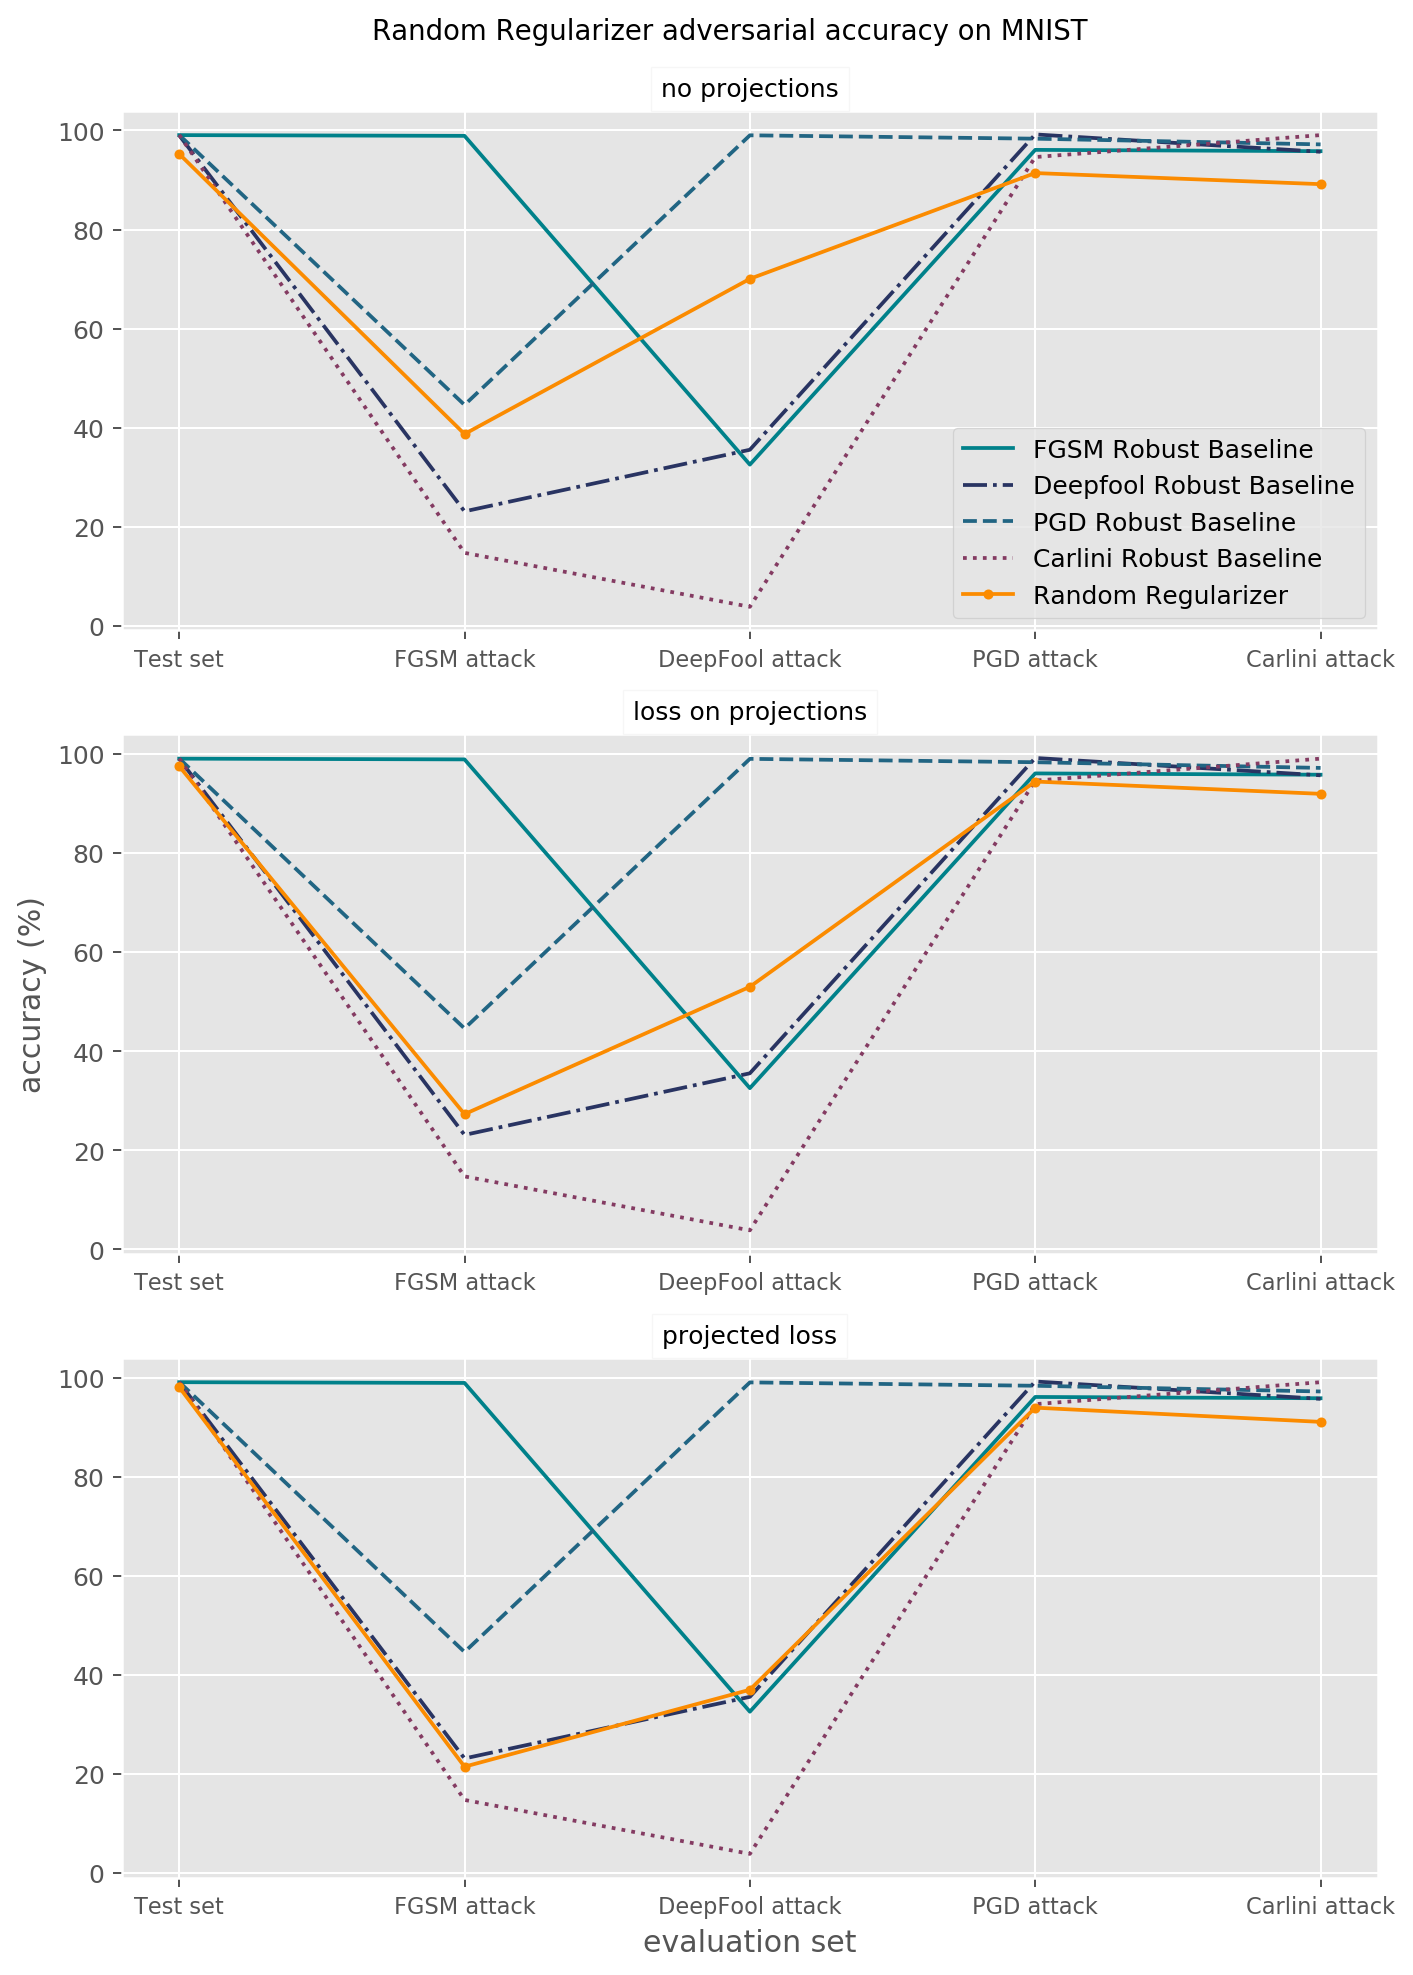

In [80]:
# random ensemble accuracy vs evaluation set
# test, fgsm, pdg, deepfool, carlini_linf
#baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

# questi valori sono tutti falsi!! devo ancora inserire quelli veri
randreg_noproj = [95.26,   38.72 ,  70.05  , 91.40  , 89.16]
randreg_lossonproj = [ 97.53,   27.30 ,  53.01  , 94.44  , 91.96  ]
randreg_projloss = [ 98.06,   21.45 ,  36.98  , 93.92  , 91.05 ]

xlab = ["Test set","FGSM attack","DeepFool attack","PGD attack","Carlini attack"]
x = range(len(xlab))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(9, 13), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax1.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax1.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax1.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,randreg_noproj,color="#FB8B00",label='Random Regularizer', marker=".")
ax1.set_xticks(x)
ax1.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax1.legend(loc='lower right')
ax1.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

ax2.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax2.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax2.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,randreg_lossonproj,color="#FB8B00",label='Random Regularizer', marker=".")
ax2.set_xticks(x)
ax2.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax2.set_title("loss on projections", fontdict={'fontsize': 10, 'fontweight': 'medium'},  loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

ax3.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax3.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax3.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,randreg_projloss,color="#FB8B00",label='Random Regularizer', marker=".")
ax3.set_xticks(x)
ax3.set_xticklabels(xlab, fontsize=xticks_fontsize) 
ax3.set_title("projected loss", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,1.7))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=11, y=0.92)
fig.show()

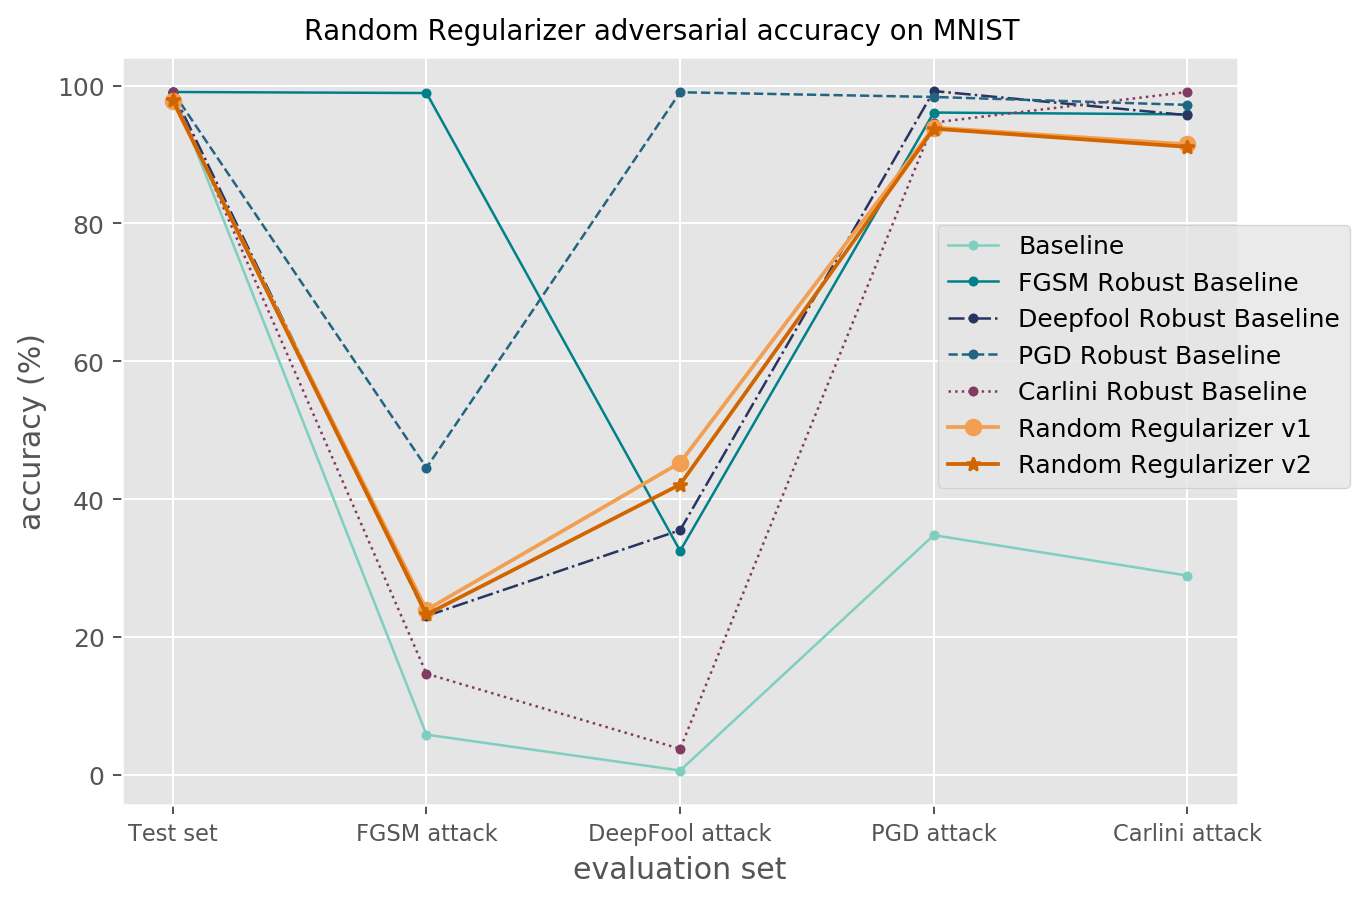

In [81]:
# random ensemble accuracy vs evaluation set
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

randreg_noproj_lam = [[94.90,   38.17,   69.67,   90.89,   89.07 ],[95.26,   38.72,   70.05,   91.40,   89.16],[95.59,   35.85,   67.28,   91.68,   89.92]]
randreg_lossonproj_lam = [[97.92 ,  22.53 ,  39.65 ,  93.24  , 90.75 ],[ 97.53,   27.30 ,  53.01  , 94.44  , 91.96 ],[97.80 ,  22.14,   43.32,   94.05,   91.73  ] ]
randreg_projloss_lam = [[97.82 ,  23.68 ,  43.07  , 93.86   ,91.56 ],[ 98.06,   21.45 ,  36.98  , 93.92  , 91.05],[ 97.69 ,  24.87  , 46.45 ,  93.45  , 90.70  ] ]

randreg_noproj = np.mean(randreg_noproj_lam, axis=0)
randreg_lossonproj = np.mean(randreg_lossonproj_lam, axis=0)
randreg_projloss = np.mean(randreg_projloss_lam, axis=0)

xlab = ["Test set","FGSM attack","DeepFool attack","PGD attack","Carlini attack"]
x = range(len(xlab))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8, 5.5), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax.plot(x, baseline, color="#7ecfc0", label='Baseline', lw=1, marker='.')

ax.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline', lw=1, marker='.')
ax.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.",lw=1, marker='.')
ax.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--",lw=1, marker='.')
ax.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":",lw=1, marker='.')

#ax.plot(x,randreg_noproj,color="#f29f52",label='Random Regularizer v0', marker="^")
ax.plot(x,randreg_lossonproj,color="#f29f52",label='Random Regularizer v1', marker="o") ##f37700
ax.plot(x,randreg_projloss,color="#d16500",label='Random Regularizer v2', marker="*")
ax.set_xticks(x)
ax.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax.legend(bbox_to_anchor=(0.72,0.6)) #loc="best"
#ax.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
#             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=11, y=0.92)
fig.show()

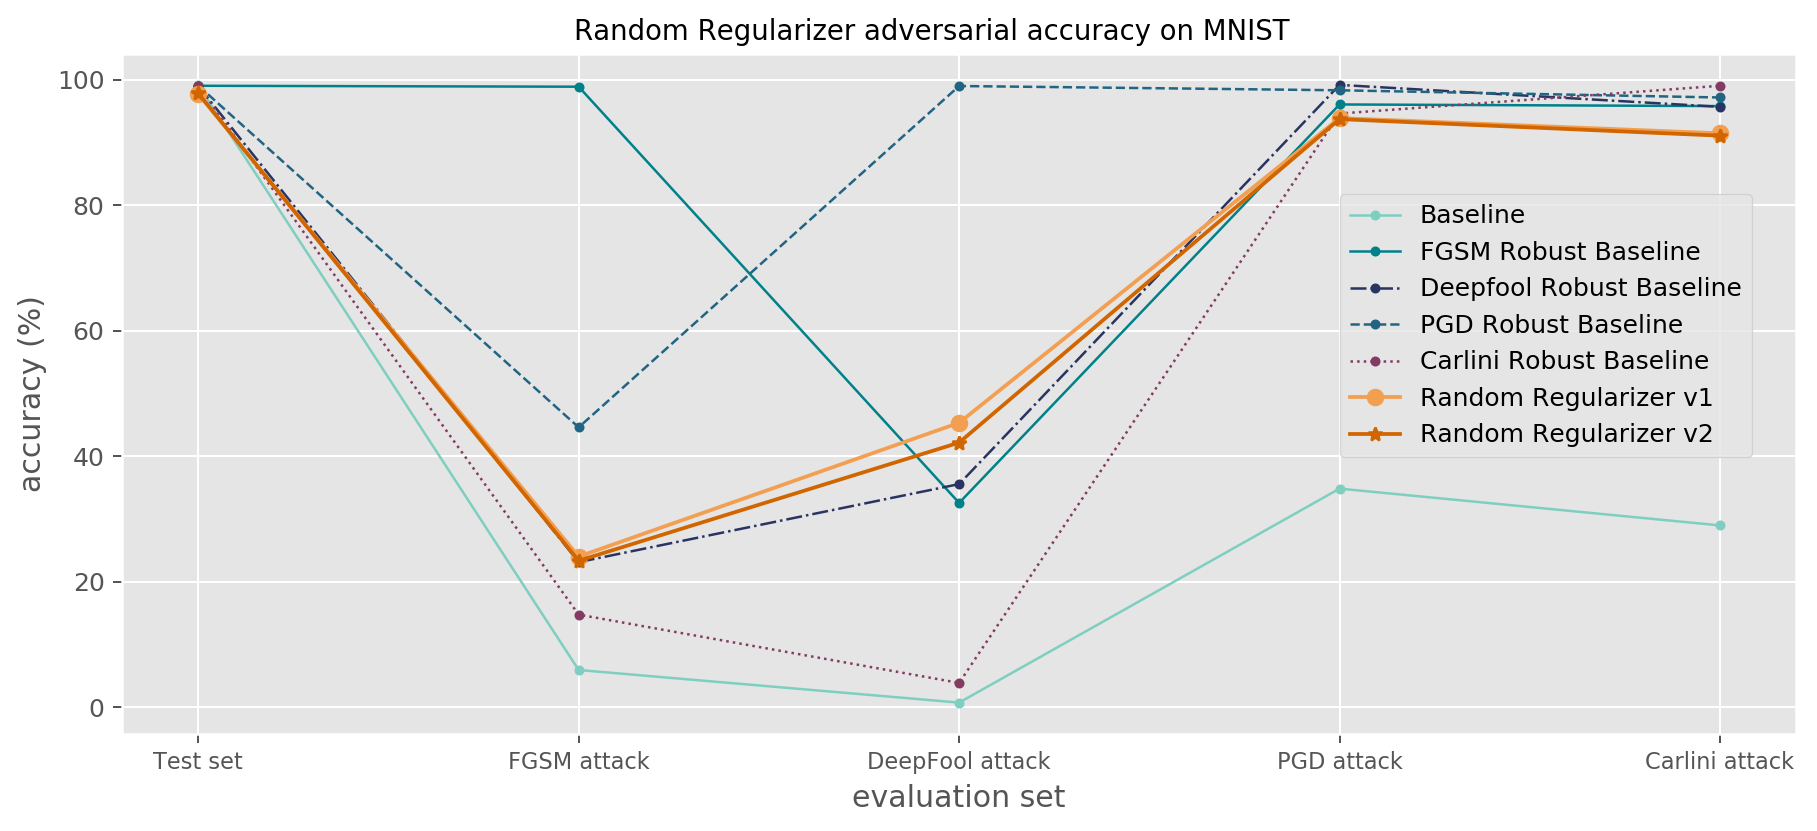

In [82]:
# random ensemble accuracy vs evaluation set
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

randreg_noproj_lam = [[94.90,   38.17,   69.67,   90.89,   89.07 ],[95.26,   38.72,   70.05,   91.40,   89.16],[95.59,   35.85,   67.28,   91.68,   89.92]]
randreg_lossonproj_lam = [[97.92 ,  22.53 ,  39.65 ,  93.24  , 90.75 ],[ 97.53,   27.30 ,  53.01  , 94.44  , 91.96 ],[97.80 ,  22.14,   43.32,   94.05,   91.73  ] ]
randreg_projloss_lam = [[97.82 ,  23.68 ,  43.07  , 93.86   ,91.56 ],[ 98.06,   21.45 ,  36.98  , 93.92  , 91.05],[ 97.69 ,  24.87  , 46.45 ,  93.45  , 90.70  ] ]

randreg_noproj = np.mean(randreg_noproj_lam, axis=0)
randreg_lossonproj = np.mean(randreg_lossonproj_lam, axis=0)
randreg_projloss = np.mean(randreg_projloss_lam, axis=0)

xlab = ["Test set","FGSM attack","DeepFool attack","PGD attack","Carlini attack"]
x = range(len(xlab))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(12, 5), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax.plot(x, baseline, color="#7ecfc0", label='Baseline', lw=1, marker='.')

ax.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline', lw=1, marker='.')
ax.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.",lw=1, marker='.')
ax.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--",lw=1, marker='.')
ax.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":",lw=1, marker='.')

#ax.plot(x,randreg_noproj,color="#f29f52",label='Random Regularizer v0', marker="^")
ax.plot(x,randreg_lossonproj,color="#f29f52",label='Random Regularizer v1', marker="o") ##f37700
ax.plot(x,randreg_projloss,color="#d16500",label='Random Regularizer v2', marker="*")
ax.set_xticks(x)
ax.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax.legend(bbox_to_anchor=(0.72,0.6)) #loc="best"
#ax.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
#             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=11, y=0.92)
fig.show()

## cifar randens 

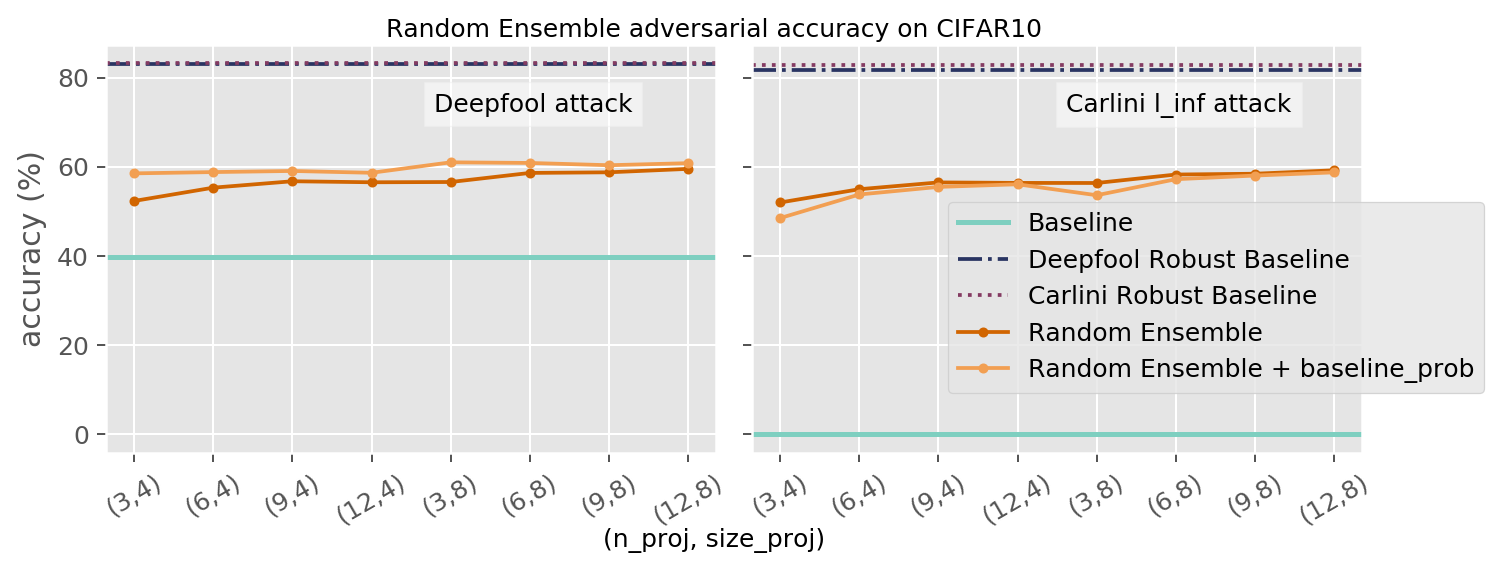

In [17]:
# random ensemble accuracy vs evaluation set
baseline = [39.77 ,  0.00]
deepfool_robust_baseline = [83.01,   81.67]
carlini_robust_baseline = [83.23 ,  82.79]
random_deepf = [ 52.32,55.31 , 56.75, 56.52,56.58, 58.62, 58.76, 59.53  ]
random_carlini = [51.98,54.96,56.49,56.38,56.36,58.26,58.44,59.21 ]
random_deepf_baseline = [58.52, 58.81,59.06 ,58.65,61.00,60.86,60.35 ,60.81  ]
random_carlini_baseline = [48.48,53.78,55.48,56.07,53.61,57.21,58.03,58.75]


xlab = ["(3,4)","(6,4)","(9,4)","(12,4)",
        "(3,8)","(6,8)","(9,8)","(12,8)"]
x = range(8)

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(9, 3), dpi=180)
#xlabel('(n_proj, size_proj)',bbox_to_anchor=(0.5,0.5))
fig.text(0.5, -0.05, '(n_proj, size_proj)', ha='center')
fig.subplots_adjust(wspace=0.06)

ax3.axhline(y=baseline[0], color="#7ecfc0",label='Baseline', linewidth=2)
ax3.axhline(y=deepfool_robust_baseline[0], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=carlini_robust_baseline[0], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#d16500",label='Random Ensemble', marker=".") #d16500 #f29f52
ax3.plot(x,random_deepf_baseline,color="#f29f52",label='Random Ensemble + baseline_prob', marker=".")
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.7, y=0.8,
             bbox=dict(facecolor='white', alpha=0.5))
ax3.set_ylabel('accuracy (%)')# position=(0.1,0.5))

ax3.set_xticks(x)
ax3.set_xticklabels(xlab, rotation=30)

ax4.axhline(y=baseline[1], color="#7ecfc0",label='Baseline', linewidth=2)
ax4.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini,color="#d16500",label='Random Ensemble', marker=".")
ax4.plot(x,random_carlini_baseline,color="#f29f52",label='Random Ensemble + baseline_prob', marker=".")
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.7, y=0.8,
             bbox=dict(facecolor='white', alpha=0.5))
ax4.set_xticks(x)
ax4.set_xticklabels(xlab, rotation=30)
ax4.legend(bbox_to_anchor=(0.3, 0.38))

fig.suptitle("Random Ensemble adversarial accuracy on CIFAR10", fontsize=10, y=0.93)
fig.show()

## cifar complexity 800 epochs

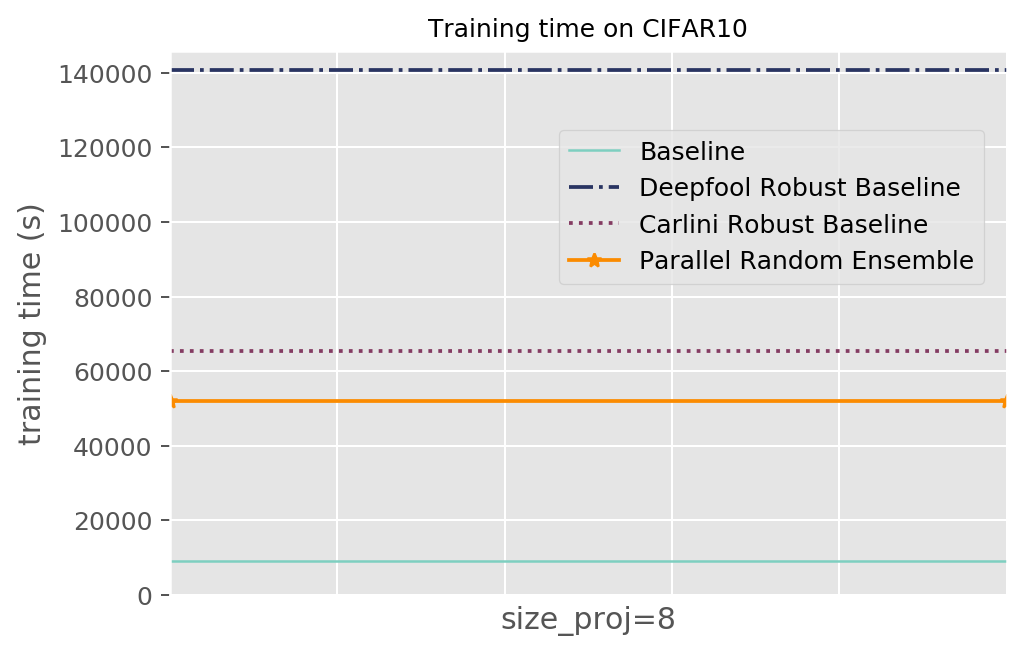

In [52]:
# random ensemble accuracy vs evaluation set

# plain, deepfool, carlini_linf
baseline = [9049.866752386093,140696.0322291851,65423.28578591347 ]
par_randens_times = [52017.7775683403]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
plt.axhline(y=par_randens_times[0],color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
#plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")

plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.xlabel('size_proj=8')
plt.ylabel('training time (s)')
plt.ylim([0, baseline[1]+5000])
plt.legend(loc='best',bbox_to_anchor=(0.45, 0.55))
plt.title("Training time on CIFAR10",fontsize=10)
plt.show()

## final randens complexity plot

/home/ginevracoal/virtualenvs/venv/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


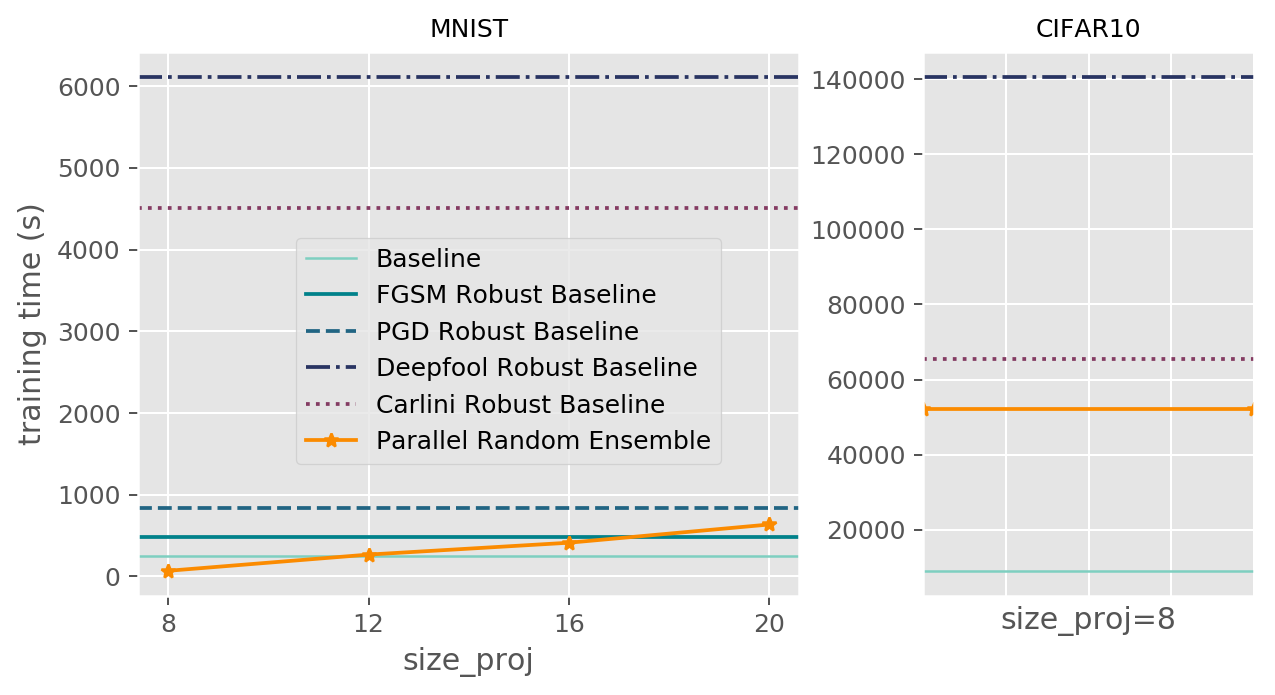

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharex=False, 
                               gridspec_kw={'width_ratios': [2, 1]}, 
                               dpi=180,
                               figsize=(8, 4))

# MNIST
# random ensemble accuracy vs evaluation set


# plain, fgsm, pgd, deepfool, carlini_linf
mnist_baseline = [244.64,486.45,833.16,6116.33,4507.31]
mnist_par_randens_times = [ 69.18349480628967,267.5957431793213,412.77997064590454,635.8284521102905]

x = range(4)
xlab=["8","12","16","20"]
ax1.axhline(y=mnist_baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
ax1.axhline(y=mnist_baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
ax1.axhline(y=mnist_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=mnist_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=mnist_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,mnist_par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
ax1.legend(bbox_to_anchor=(0.9, 0.45))
ax1.set_xlabel('size_proj')
ax1.set_ylabel('training time (s)')
ax1.set_xticks(x)
ax1.set_xticklabels(xlab)
ax1.set_title("MNIST",fontsize=10)

# CIFAR
cifar_baseline = [9049.866752386093,140696.0322291851,65423.28578591347 ]
cifar_par_randens_times = [52017.7775683403]
ax2.axhline(y=cifar_baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
ax2.axhline(y=cifar_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=cifar_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.axhline(y=cifar_par_randens_times[0],color='#FB8B00',label='Parallel Random Ensemble', marker="*")

ax2.tick_params(axis='x',bottom=False,labelbottom=False)
ax2.set_xlabel('size_proj=8')
ax2.set_title("CIFAR10",fontsize=10)

fig.subplots_adjust(wspace=0.25)
fig.show()

## Cifar randreg

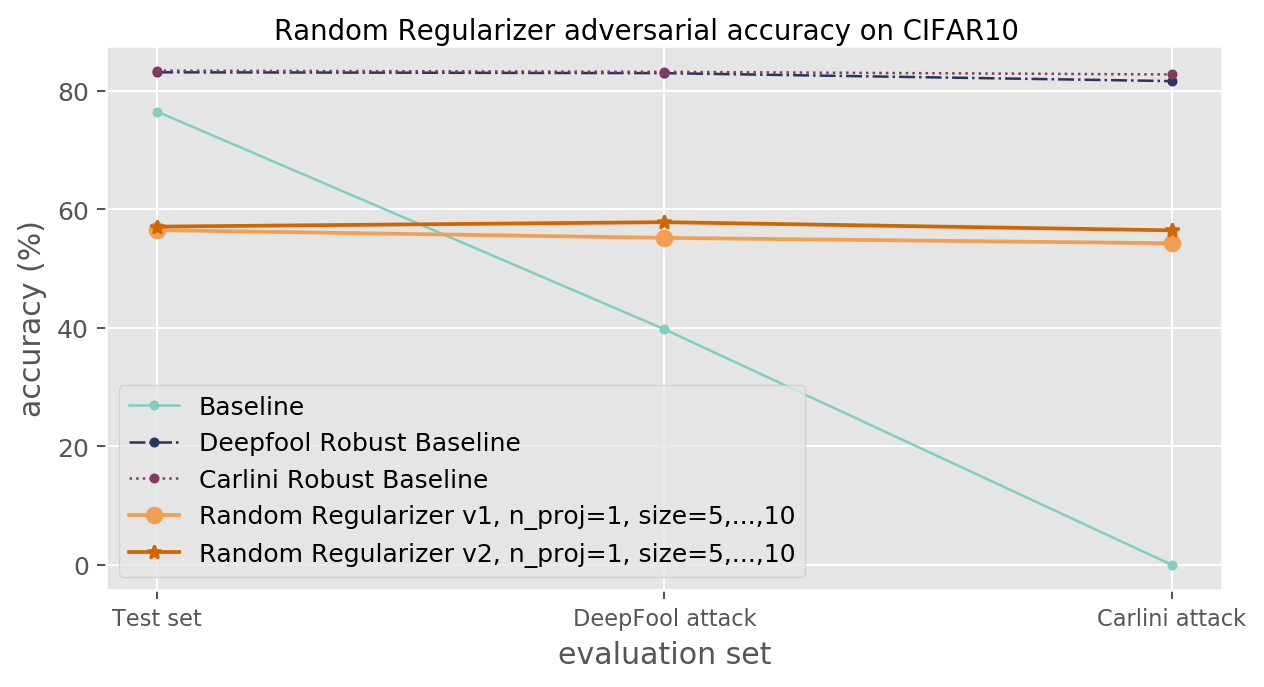

In [101]:
# random ensemble accuracy vs evaluation set
# test, deepfool, carlini_linf

baseline = [76.52, 39.77 ,  0.00]
deepfool_robust_baseline = [83.16, 83.01,   81.67]
carlini_robust_baseline = [83.44, 83.23 ,  82.79]

randreg_noproj_lam = [[51.93 ,  51.42  , 50.96 ]]
randreg_lossonproj_lam =[[56.51 ,  55.20,   54.29]]
randreg_projloss_lam =[[57.10  , 57.85 ,  56.47]]

randreg_noproj = np.mean(randreg_noproj_lam, axis=0)
randreg_lossonproj = np.mean(randreg_lossonproj_lam, axis=0)
randreg_projloss = np.mean(randreg_projloss_lam, axis=0)

xlab = ["Test set","DeepFool attack","Carlini attack"]
x = range(len(xlab))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8, 4), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax.plot(x, baseline, color="#7ecfc0", label='Baseline', lw=1, marker='.')
ax.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.",lw=1, marker='.')
ax.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":",lw=1, marker='.')

#ax.plot(x,randreg_noproj,color="#f29f52",label='Random Regularizer v0', marker="^")
ax.plot(x,randreg_lossonproj,color="#f29f52",label='Random Regularizer v1, n_proj=1, size=5,...,10', marker="o") ##f37700
ax.plot(x,randreg_projloss,color="#d16500",label='Random Regularizer v2, n_proj=1, size=5,...,10', marker="*")
ax.set_xticks(x)
ax.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax.legend(loc="lower left")#bbox_to_anchor=(0.72,0.6)) #loc="best"
#ax.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
#             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on CIFAR10", fontsize=11, y=0.92)
fig.show()

## projections

In [2]:
import sys
sys.path.insert(0, '../src')
from random_ensemble import *
from utils import *


Using TensorFlow backend.


In [19]:
dataset_name="cifar"
projection_mode="channels"

x_train, y_train, x_test, y_test, input_shape, num_classes, data_format = load_dataset(dataset_name, test=True)
augmented_inputs_list = []#np.array((4,100,input_shape[0],input_shape[1],input_shape[2]))

for n_proj in [2,4,8]:
    for size_proj in [2,4,6]:
        model = RandomEnsemble(input_shape=input_shape, num_classes=num_classes,
                                       n_proj=n_proj, size_proj=size_proj, projection_mode=projection_mode,
                                       data_format=data_format, dataset_name=dataset_name, test=True)

        projections, inverse_projections = model.compute_projections(input_data=x_test)
        perturbations, augmented_inputs = compute_perturbations(input_data=x_test, inverse_projections=inverse_projections)
        
        augmented_inputs_list += [augmented_inputs]
        
        print(len(augmented_inputs_list))


 === RandEns model ( n_proj =  2 , size_proj =  2 ) ===
Input shape:  (100, 32, 32, 3)

Computing  2 random projections in  channels mode: 
Projected data dimensions: (2, 100, 2, 2, 3)
1

 === RandEns model ( n_proj =  2 , size_proj =  4 ) ===
Input shape:  (100, 32, 32, 3)

Computing  2 random projections in  channels mode: 
Projected data dimensions: (2, 100, 4, 4, 3)
2

 === RandEns model ( n_proj =  2 , size_proj =  6 ) ===
Input shape:  (100, 32, 32, 3)

Computing  2 random projections in  channels mode: 
Projected data dimensions: (2, 100, 6, 6, 3)
3

 === RandEns model ( n_proj =  4 , size_proj =  2 ) ===
Input shape:  (100, 32, 32, 3)

Computing  4 random projections in  channels mode: 
Projected data dimensions: (4, 100, 2, 2, 3)
4

 === RandEns model ( n_proj =  4 , size_proj =  4 ) ===
Input shape:  (100, 32, 32, 3)

Computing  4 random projections in  channels mode: 
Projected data dimensions: (4, 100, 4, 4, 3)
5

 === RandEns model ( n_proj =  4 , size_proj =  6 ) ===
Inp

Text(0, 0.5, 'n_proj=8')

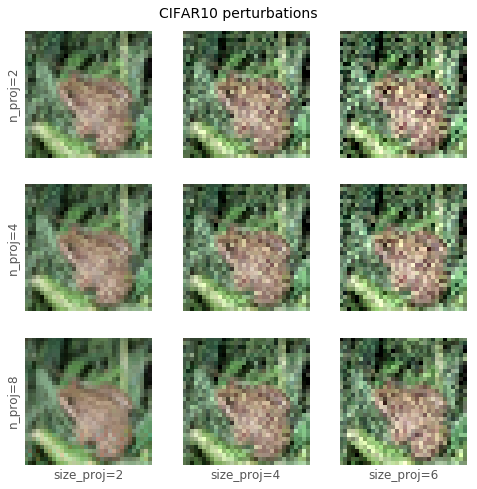

In [39]:
#image_data_list = [x_test] + augmented_inputs_list
im_idx = 4
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharex=False, sharey=False)
fig.suptitle("CIFAR10 perturbations", fontsize=14, y=0.92)

for row in range(3):
    for col in range(3):
#for group in range(len(image_data_list)):
#    for im_idx in range(n_images):
        axs[row, col].imshow(np.squeeze(image_data_list[row*3+col][im_idx]), cmap=None)
        axs[row, col].set_xticks([])
        axs[row, col].set_yticks([])
        axs[row, col].set_xticklabels([])
        axs[row, col].set_yticklabels([])

fontsize=12
axs[2,0].set_xlabel('size_proj=2', fontsize=fontsize)
axs[2,1].set_xlabel('size_proj=4', fontsize=fontsize)
axs[2,2].set_xlabel('size_proj=6', fontsize=fontsize)
                    
axs[0,0].set_ylabel('n_proj=2', fontsize=fontsize)
axs[1,0].set_ylabel('n_proj=4', fontsize=fontsize)
axs[2,0].set_ylabel('n_proj=8', fontsize=fontsize)

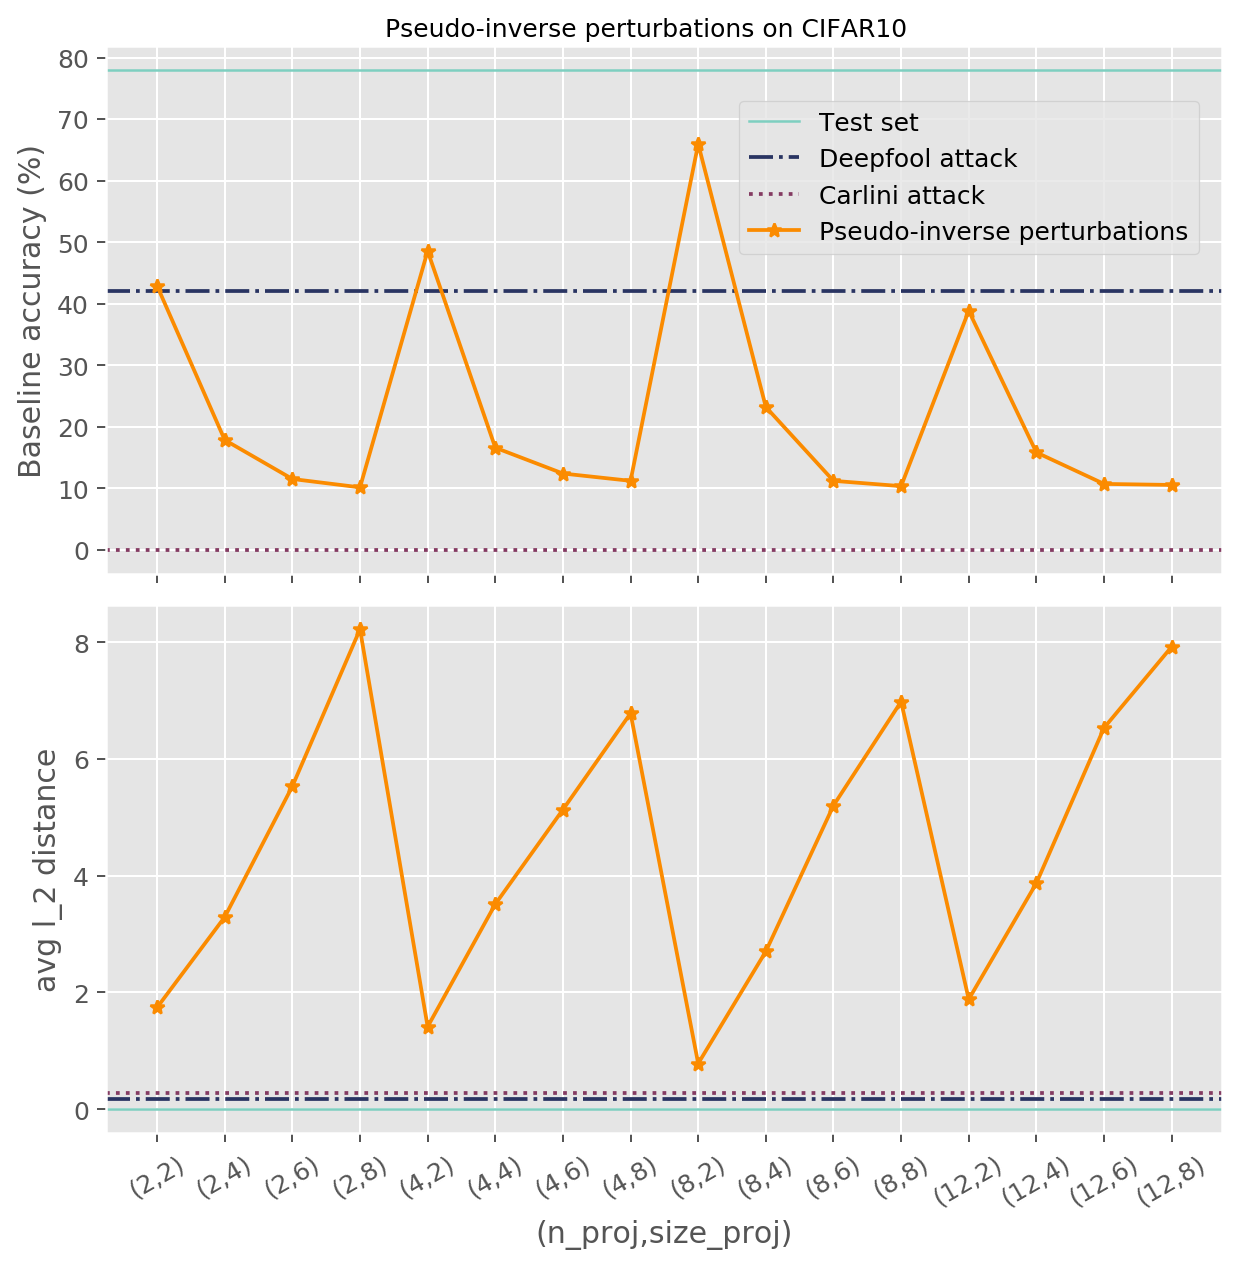

In [9]:
# random ensemble accuracy vs evaluation set
                                                                  
                                                                  
xlab = ["(2,2)","(2,4)","(2,6)","(2,8)",
        "(4,2)","(4,4)","(4,6)","(4,8)",
        "(8,2)","(8,4)","(8,6)","(8,8)",
        "(12,2)","(12,4)","(12,6)","(12,8)",
       ]
x = range(16)

# test, deepfool, carlini
baseline_attacks = [78.00, 42.00, 00.00]
# pinv perturbations
baseline_perturbations = [    
     42.87,  17.82,  11.48,  10.12,  
   48.54,  16.57,  12.37,  11.18,  
   65.95,  23.18,  11.18,  10.32,  
   38.82,  15.80,  10.68,  10.51] 


attacks_distance =[ 0, 0.1663116, 0.28179914 ]

perturbations_distance = [
      1.74,  3.29,  5.53,  8.22,  
    1.41,  3.51,  5.13,  6.78,  
    0.78,  2.70,  5.20,  6.98,  
    1.88,  3.87,  6.53,  7.92  ]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8), dpi=180)

# baseline accuracy on eval set
ax1.axhline(y=baseline_attacks[0], color='#7ecfc0', label='Test set', linewidth=1)
ax1.axhline(y=baseline_attacks[1], color="#293462", label='Deepfool attack', ls="-.")
ax1.axhline(y=baseline_attacks[2], color="#843b62", label='Carlini attack', ls=":")
ax1.plot(x,baseline_perturbations,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax1.set_ylabel('Baseline accuracy (%)')

# average distance

ax2.axhline(y=attacks_distance[0], color='#7ecfc0', label='Test set', linewidth=1)
ax2.axhline(y=attacks_distance[1], color="#293462", label='Deepfool attack', ls="-.")
ax2.axhline(y=attacks_distance[2], color="#843b62", label='Carlini attack', ls=":")
ax2.plot(x,perturbations_distance,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax2.set_ylabel('avg l_2 distance')

plt.xlabel('(n_proj,size_proj)')
fig.subplots_adjust(hspace=0.06)
plt.xticks(x, xlab, rotation=30) 
plt.legend(loc='best', bbox_to_anchor=(0.99,1.98))

#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
#ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,          bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Pseudo-inverse perturbations on CIFAR10", fontsize=10, y=0.9)
fig.show()

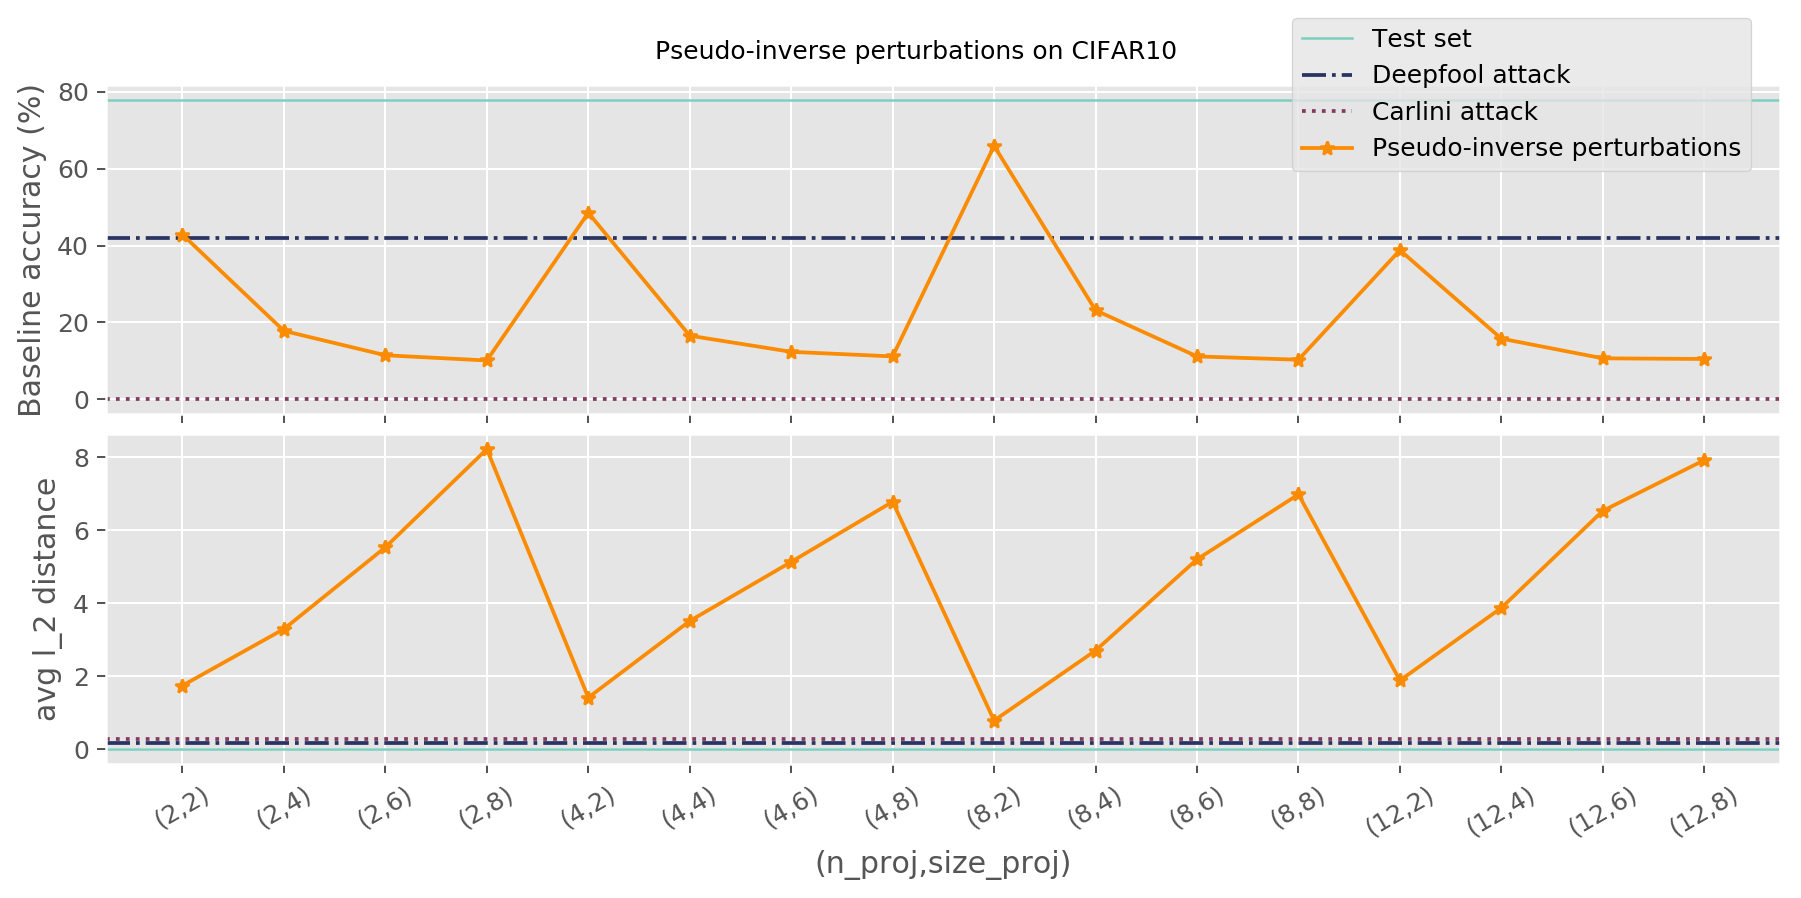

In [98]:
# random ensemble accuracy vs evaluation set
                                                                  
                                                                  
xlab = ["(2,2)","(2,4)","(2,6)","(2,8)",
        "(4,2)","(4,4)","(4,6)","(4,8)",
        "(8,2)","(8,4)","(8,6)","(8,8)",
        "(12,2)","(12,4)","(12,6)","(12,8)",
       ]
x = range(16)

# test, deepfool, carlini
baseline_attacks = [78.00, 42.00, 00.00]
# pinv perturbations
baseline_perturbations = [    
     42.87,  17.82,  11.48,  10.12,  
   48.54,  16.57,  12.37,  11.18,  
   65.95,  23.18,  11.18,  10.32,  
   38.82,  15.80,  10.68,  10.51] 


attacks_distance =[ 0, 0.1663116, 0.28179914 ]

perturbations_distance = [
      1.74,  3.29,  5.53,  8.22,  
    1.41,  3.51,  5.13,  6.78,  
    0.78,  2.70,  5.20,  6.98,  
    1.88,  3.87,  6.53,  7.92  ]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 5), dpi=180)

# baseline accuracy on eval set
ax1.axhline(y=baseline_attacks[0], color='#7ecfc0', label='Test set', linewidth=1)
ax1.axhline(y=baseline_attacks[1], color="#293462", label='Deepfool attack', ls="-.")
ax1.axhline(y=baseline_attacks[2], color="#843b62", label='Carlini attack', ls=":")
ax1.plot(x,baseline_perturbations,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax1.set_ylabel('Baseline accuracy (%)')

# average distance

ax2.axhline(y=attacks_distance[0], color='#7ecfc0', label='Test set', linewidth=1)
ax2.axhline(y=attacks_distance[1], color="#293462", label='Deepfool attack', ls="-.")
ax2.axhline(y=attacks_distance[2], color="#843b62", label='Carlini attack', ls=":")
ax2.plot(x,perturbations_distance,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax2.set_ylabel('avg l_2 distance')

plt.xlabel('(n_proj,size_proj)')
fig.subplots_adjust(hspace=0.06)
plt.xticks(x, xlab, rotation=30) 
plt.legend(loc='best', bbox_to_anchor=(0.99,2.3))

#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
#ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,          bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Pseudo-inverse perturbations on CIFAR10", fontsize=10, y=0.93)
fig.show()

## mnist randens class reports

In [2]:
test_final = [ 0.98,  0.99,  0.98,  0.99,  0.99,  0.99,  0.99,  0.98,  0.98,  0.98] 
fgsm_final = [0.65, 0.00, 0.54, 0.31, 0.14, 0.37, 0.56, 0.43, 0.14, 0.09]
pgd_final = [0.89, 0.78, 0.59, 0.58, 0.52, 0.72, 0.86, 0.84, 0.33, 0.41,]
deepfool_final = [0.97, 0.99, 0.96, 0.96, 0.96, 0.98, 0.97, 0.98, 0.95, 0.95]
carlini_final = [0.97, 0.98, 0.95, 0.95, 0.92, 0.96, 0.96, 0.95, 0.95, 0.94]

In [3]:
test = [[0.98,  0.99,  0.98,  0.97,  0.97,  0.97,  0.97,  0.98,  0.96,  0.97],   
 [0.98,  0.99,  0.97,  0.97,  0.98,  0.98,  0.99,  0.98,  0.96,  0.98],   
 [0.98,  0.99,  0.97,  0.96,  0.97,  0.98,  0.98,  0.98,  0.97,  0.97],   
 [0.98,  0.99,  0.97,  0.96,  0.97,  0.98,  0.97,  0.97,  0.98,  0.98],   
 [0.98,  0.99,  0.98,  0.98,  0.96,  0.98,  0.98,  0.98,  0.96,  0.97],   
 [0.97,  0.99,  0.97,  0.97,  0.98,  0.98,  0.98,  0.98,  0.97,  0.96],   
 [0.98,  0.99,  0.97,  0.99,  0.98,  0.98,  0.98,  0.97,  0.97,  0.98],   
 [0.98,  0.99,  0.97,  0.98,  0.97,  0.98,  0.99,  0.97,  0.96,  0.97],   
 [0.99,  0.99,  0.97,  0.97,  0.97,  0.98,  0.98,  0.98,  0.97,  0.98],   
 [0.98,  0.99,  0.96,  0.98,  0.97,  0.98,  0.98,  0.98,  0.95,  0.98],   
 [0.98,  0.99,  0.97,  0.98,  0.98,  0.98,  0.99,  0.97,  0.97,  0.97],   
 [0.97,  0.99,  0.97,  0.97,  0.98,  0.98,  0.98,  0.97,  0.96,  0.97]]   

fgsm = [[0.62,  0.00,  0.48,  0.26,  0.17,  0.29,  0.48,  0.48,  0.12,  0.09], 
 [0.68,  0.00,  0.38,  0.31,  0.22,  0.27,  0.58,  0.42,  0.12,  0.20], 
 [0.59,  0.00,  0.54,  0.25,  0.24,  0.25,  0.57,  0.48,  0.14,  0.13], 
 [0.49,  0.00,  0.37,  0.21,  0.19,  0.24,  0.55,  0.35,  0.15,  0.14], 
 [0.66,  0.00,  0.55,  0.32,  0.24,  0.32,  0.42,  0.57,  0.13,  0.04], 
 [0.57,  0.00,  0.44,  0.28,  0.14,  0.25,  0.58,  0.46,  0.11,  0.24], 
 [0.51,  0.00,  0.47,  0.38,  0.13,  0.36,  0.45,  0.48,  0.13,  0.12], 
 [0.50,  0.00,  0.41,  0.25,  0.11,  0.18,  0.53,  0.55,  0.14,  0.13], 
 [0.57,  0.17,  0.43,  0.21,  0.26,  0.30,  0.48,  0.43,  0.13,  0.08], 
 [0.58,  0.00,  0.45,  0.37,  0.19,  0.37,  0.49,  0.34,  0.14,  0.08], 
 [0.61,  0.03,  0.47,  0.26,  0.11,  0.25,  0.55,  0.16,  0.16,  0.13], 
 [0.51,  0.00,  0.45,  0.25,  0.29,  0.36,  0.39,  0.30,  0.15,  0.22]] 

pgd =  [[0.85,  0.80,  0.51,  0.57,  0.49,  0.57,  0.81,  0.75,  0.29,  0.36],    
  [0.89,  0.81,  0.52,  0.53,  0.48,  0.63,  0.86,  0.85,  0.26,  0.32],    
  [0.84,  0.93,  0.61,  0.58,  0.50,  0.57,  0.81,  0.78,  0.34,  0.34],    
  [0.88,  0.82,  0.46,  0.43,  0.49,  0.59,  0.85,  0.69,  0.35,  0.43],    
  [0.87,  0.89,  0.62,  0.45,  0.46,  0.55,  0.84,  0.78,  0.30,  0.37],    
  [0.88,  0.88,  0.57,  0.47,  0.46,  0.49,  0.86,  0.71,  0.33,  0.38],    
  [0.84,  0.92,  0.51,  0.64,  0.52,  0.61,  0.83,  0.85,  0.34,  0.39],    
  [0.87,  0.83,  0.50,  0.47,  0.52,  0.60,  0.80,  0.79,  0.34,  0.38],    
  [0.89,  0.76,  0.62,  0.51,  0.48,  0.61,  0.84,  0.84,  0.27,  0.47],    
  [0.82,  0.81,  0.48,  0.61,  0.50,  0.66,  0.89,  0.86,  0.29,  0.49],    
  [0.86,  0.82,  0.62,  0.54,  0.50,  0.59,  0.85,  0.74,  0.26,  0.40],    
  [0.89,  0.85,  0.53,  0.42,  0.58,  0.62,  0.79,  0.75,  0.44,  0.44]]    

deepfool = [[0.96,  0.99,  0.97,  0.93,  0.94,  0.94,  0.95,  0.96,  0.91,  0.93],    
 [0.97,  0.99,  0.95,  0.92,  0.91,  0.96,  0.96,  0.97,  0.88,  0.92],    
 [0.97,  0.99,  0.95,  0.93,  0.94,  0.95,  0.96,  0.96,  0.92,  0.91],    
 [0.96,  0.99,  0.96,  0.90,  0.92,  0.95,  0.94,  0.93,  0.95,  0.94],    
 [0.97,  0.99,  0.95,  0.93,  0.91,  0.97,  0.97,  0.97,  0.90,  0.91],    
 [0.97,  0.99,  0.95,  0.92,  0.94,  0.95,  0.97,  0.96,  0.93,  0.88],    
 [0.84,  0.92,  0.51,  0.64,  0.52,  0.61,  0.83,  0.85,  0.34,  0.39],    
 [0.97,  0.99,  0.94,  0.94,  0.93,  0.97,  0.96,  0.96,  0.90,  0.93],    
 [0.97,  0.99,  0.96,  0.93,  0.92,  0.96,  0.97,  0.97,  0.90,  0.95],    
 [0.97,  0.98,  0.94,  0.96,  0.93,  0.95,  0.96,  0.97,  0.89,  0.92],    
 [0.96,  0.98,  0.95,  0.95,  0.95,  0.95,  0.97,  0.95,  0.92,  0.92],    
 [0.96,  0.98,  0.96,  0.92,  0.95,  0.95,  0.96,  0.96,  0.91,  0.92]]    

carlini = [[0.96,  0.97,  0.96,  0.92,  0.87,  0.89,  0.94,  0.93,  0.92,  0.92],  
 [0.97,  0.98,  0.93,  0.92,  0.84,  0.94,  0.97,  0.94,  0.89,  0.92],  
 [0.97,  0.99,  0.95,  0.92,  0.94,  0.95,  0.98,  0.96,  0.92,  0.91],  
 [0.96,  0.97,  0.94,  0.89,  0.87,  0.93,  0.94,  0.89,  0.95,  0.93],  
 [0.97,  0.97,  0.93,  0.93,  0.84,  0.95,  0.96,  0.94,  0.91,  0.90],  
 [0.96,  0.98,  0.93,  0.90,  0.89,  0.94,  0.96,  0.95,  0.93,  0.87],  
 [0.96,  0.97,  0.93,  0.94,  0.87,  0.93,  0.95,  0.91,  0.93,  0.92],  
 [0.97,  0.98,  0.92,  0.94,  0.88,  0.95,  0.95,  0.94,  0.91,  0.91],  
 [0.97,  0.98,  0.94,  0.91,  0.87,  0.92,  0.96,  0.93,  0.92,  0.93],  
 [0.97,  0.97,  0.92,  0.95,  0.86,  0.93,  0.96,  0.95,  0.91,  0.92],  
 [0.96,  0.97,  0.93,  0.94,  0.89,  0.91,  0.96,  0.92,  0.94,  0.91],  
 [0.95,  0.97,  0.93,  0.91,  0.90,  0.92,  0.95,  0.93,  0.91,  0.92]]  

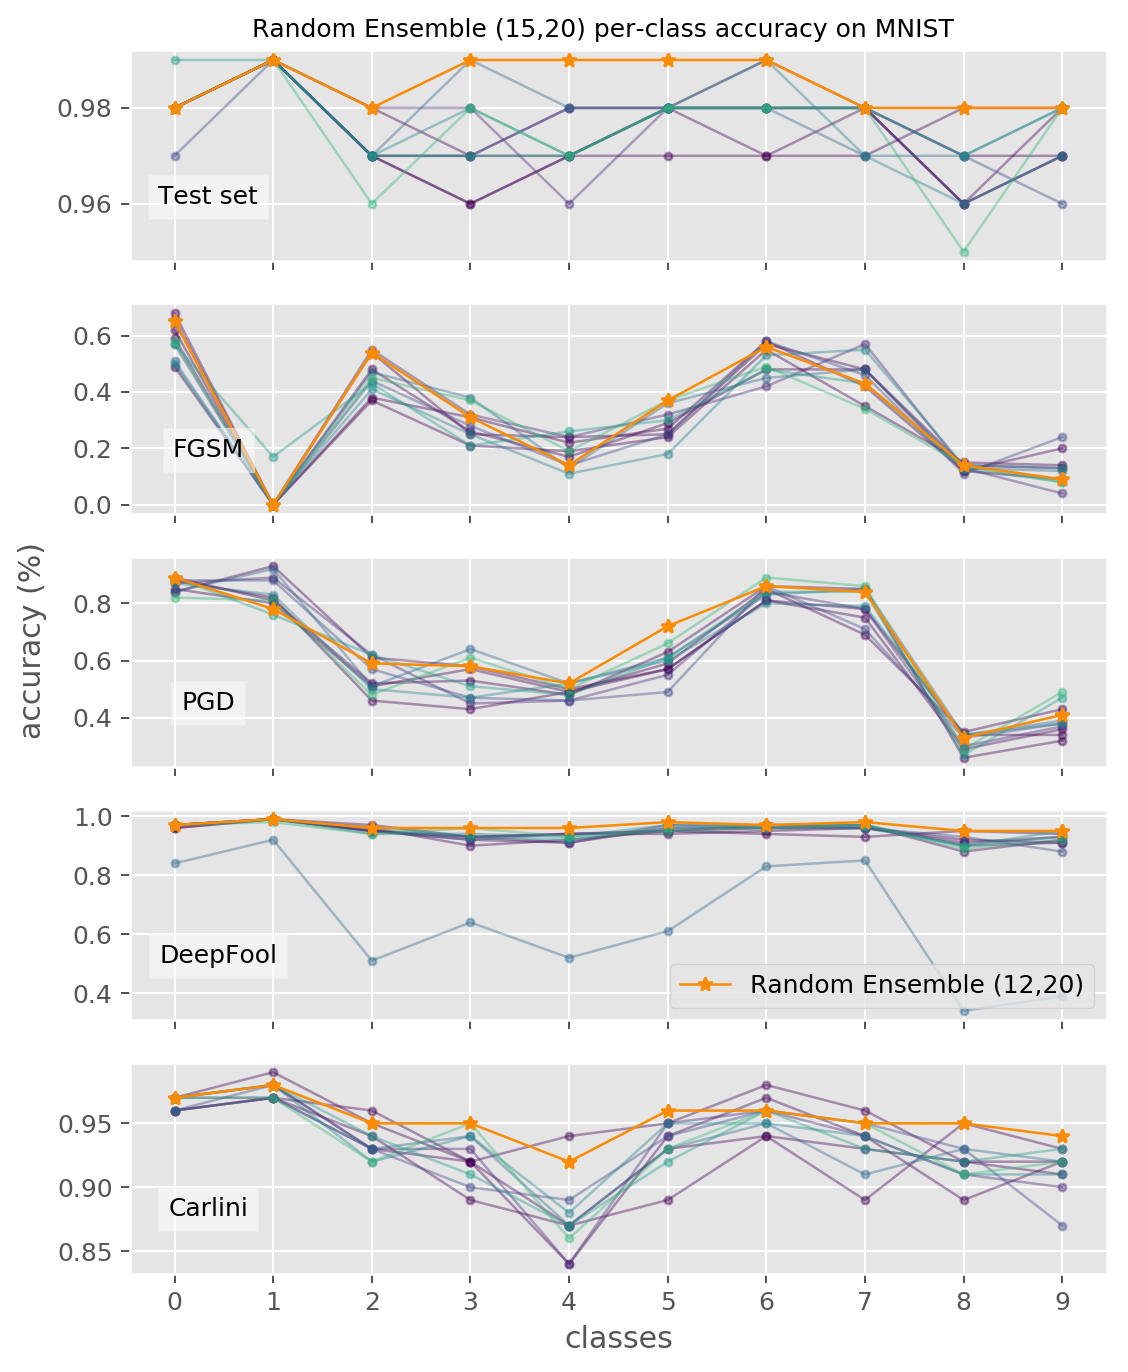

In [38]:
from matplotlib.cm import get_cmap
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcolors

n = 10 # classes
xlab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
x = range(n)
colormap = cm.viridis
normalize = mcolors.Normalize(vmin=3, vmax=12)
randens_color = "#FB8B00"#"#BF0000" ##293462

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(7, 9), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,3))
plt.xlabel('classes')
plt.xticks(x, xlab, rotation=0) 
fig.subplots_adjust(wspace=0.0)



for i,c in enumerate(x): 
    color = colormap(normalize(c))
    alpha = 0.4
    ax1.plot(x, test[i], color=color, marker=".",alpha=alpha,lw=1)
    ax2.plot(x, fgsm[i], color=color, marker=".",alpha=alpha,lw=1)
    ax3.plot(x, pgd[i], color=color, marker=".",alpha=alpha,lw=1)
    ax4.plot(x, deepfool[i], color=color, marker=".",alpha=alpha,lw=1)
    ax5.plot(x, carlini[i], color=color, marker=".",alpha=alpha,lw=1)
    
alpha = 1
ax1.plot(x, test_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax2.plot(x, fgsm_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax3.plot(x, pgd_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax4.plot(x, deepfool_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax5.plot(x, carlini_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')

# ax1.axhline(y=[0.9831],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax2.axhline(y=[0.2475],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax3.axhline(y=[0.5758],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax4.axhline(y=[0.9665],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax5.axhline(y=[0.9553],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)

ax4.legend(loc='lower right')
ax1.set_title("Test set", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax2.set_title("FGSM", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax3.set_title("PGD", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax4.set_title("DeepFool", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.09, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax5.set_title("Carlini", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble (15,20) per-class accuracy on MNIST", fontsize=10, y=0.9)
fig.show()

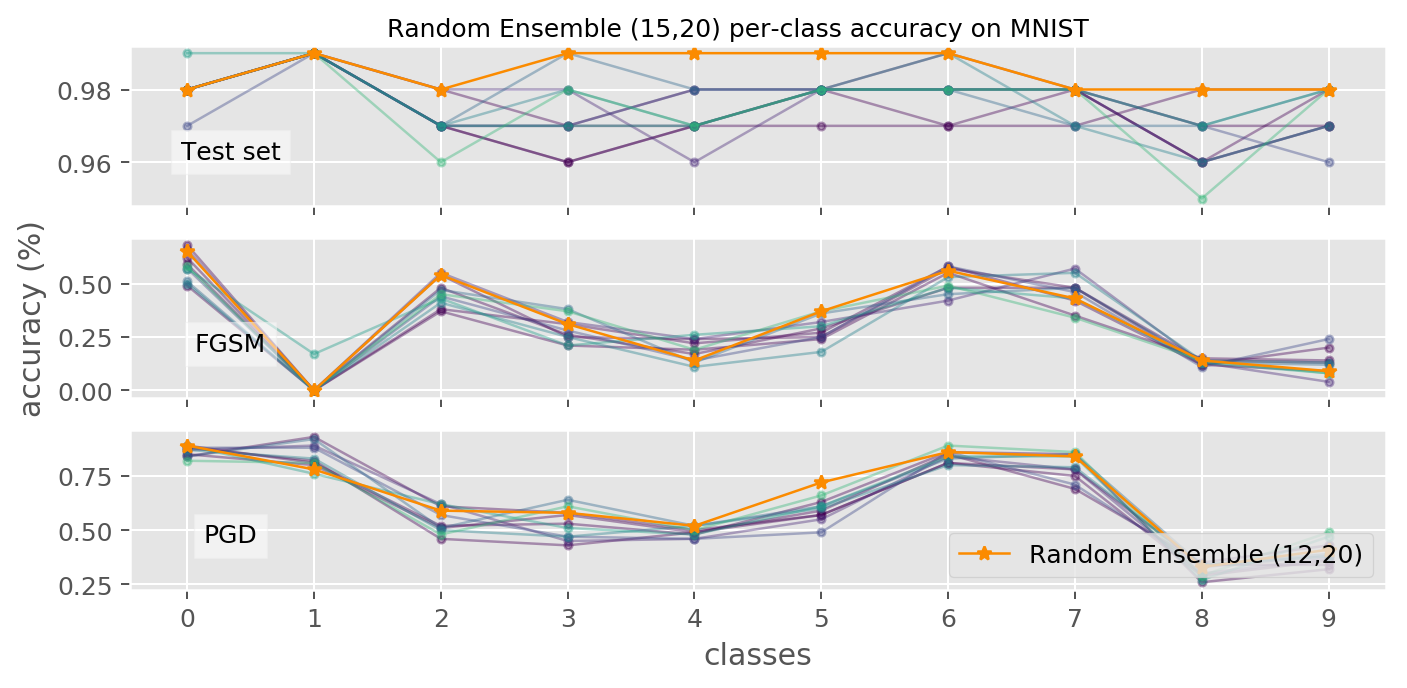

In [30]:
from matplotlib.cm import get_cmap
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcolors

n = 10 # classes
xlab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
x = range(n)
colormap = cm.viridis
normalize = mcolors.Normalize(vmin=3, vmax=12)
randens_color = "#FB8B00"#"#BF0000" ##293462

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 4), dpi=180)
plt.xlabel('classes')
plt.xticks(x, xlab, rotation=0) 
fig.subplots_adjust(wspace=0.0)



for i,c in enumerate(x): 
    color = colormap(normalize(c))
    alpha = 0.4
    ax1.plot(x, test[i], color=color, marker=".",alpha=alpha,lw=1)
    ax2.plot(x, fgsm[i], color=color, marker=".",alpha=alpha,lw=1)
    ax3.plot(x, pgd[i], color=color, marker=".",alpha=alpha,lw=1)
    
alpha = 1
ax1.plot(x, test_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax2.plot(x, fgsm_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax3.plot(x, pgd_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')

ax2.set_ylabel('accuracy (%)', position=(0,0.5))

# ax1.axhline(y=[0.9831],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax2.axhline(y=[0.2475],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax3.axhline(y=[0.5758],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax4.axhline(y=[0.9665],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax5.axhline(y=[0.9553],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)

ax3.legend(loc='lower right')
ax1.set_title("Test set", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax2.set_title("FGSM", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax3.set_title("PGD", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble (15,20) per-class accuracy on MNIST", fontsize=10, y=0.92)
fig.show()

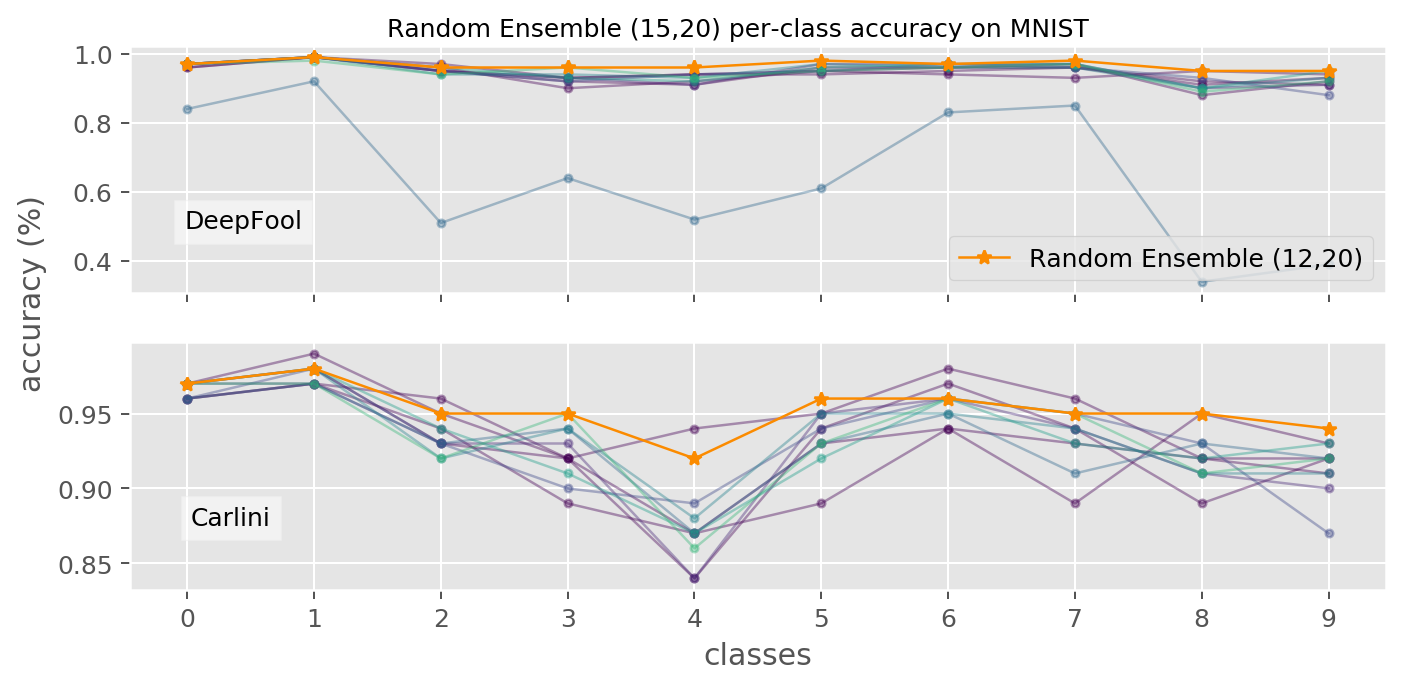

In [31]:
from matplotlib.cm import get_cmap
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcolors

n = 10 # classes
xlab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
x = range(n)
colormap = cm.viridis
normalize = mcolors.Normalize(vmin=3, vmax=12)
randens_color = "#FB8B00"#"#BF0000" ##293462

fig, (ax4, ax5) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 4), dpi=180)
plt.xlabel('classes')
plt.xticks(x, xlab, rotation=0) 
fig.subplots_adjust(wspace=0.0)



for i,c in enumerate(x): 
    color = colormap(normalize(c))
    alpha = 0.4
    ax4.plot(x, deepfool[i], color=color, marker=".",alpha=alpha,lw=1)
    ax5.plot(x, carlini[i], color=color, marker=".",alpha=alpha,lw=1)
    
alpha = 1
ax4.plot(x, deepfool_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')
ax5.plot(x, carlini_final, color=randens_color, marker="*",alpha=alpha,lw=1,label='Random Ensemble (12,20)')

ax5.set_ylabel('accuracy (%)', position=(0,1.2))

# ax1.axhline(y=[0.9831],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax2.axhline(y=[0.2475],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax3.axhline(y=[0.5758],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax4.axhline(y=[0.9665],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)
# ax5.axhline(y=[0.9553],color=randens_color,label='Random Ensemble (12,20)', ls="dashed", linewidth=1)

ax4.legend(loc='lower right')
ax4.set_title("DeepFool", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.09, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))
ax5.set_title("Carlini", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.2,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble (15,20) per-class accuracy on MNIST", fontsize=10, y=0.92)
fig.show()

## loss

In [38]:
import sys
sys.path.append("../src/")
import utils
from baseline_convnet import BaselineConvnet
from keras.models import load_model
from art.classifiers import TFClassifier
from utils import *

# load models
x_train, y_train, x_test, y_test, input_shape, num_classes = preprocess_mnist()

model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes)

#baseline_classifier = model.load_classifier(relative_path="../trained_models/IBM-art/mnist_cnn_robust.h5")

baseline = model.load_classifier("../trained_models/baseline/baseline.h5")


Loading mnist.
x_train shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)

Loading the model.


In [59]:
baseline.loss_gradient

<bound method KerasClassifier.loss_gradient of art.classifiers.keras.KerasClassifier(clip_values=(0, 255), model=<keras.engine.training.Model object at 0x7fae6e2cb518>, use_logits=False, channel_index=3, defences=None, preprocessing=(0, 1), input_layer=0, output_layer=0, custom_activation=False)>

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# summarize history for loss
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# list all data in history
print(baseline_classifier.history.keys())
# summarize history for accuracy
plt.plot(baseline_classifier.history['acc'])
plt.plot(baseline_classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

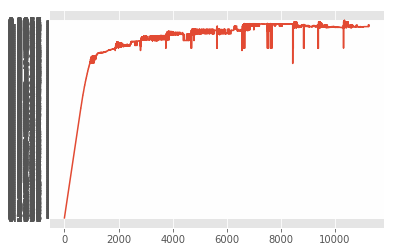

In [2]:
with open('../trained_models/baseline/log_files/pgd_advtraining_plot.txt') as f:
    lines = f.readlines()
    loss = [line.split()[0] for line in lines]
    acc = [line.split()[1] for line in lines]
plt.plot(acc)
plt.show()